# ¡Hola!  

Mi nombre es Maria Efimova, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# Descripción del Proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
(Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026).
El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (La Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


# Descripción de datos
* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género)
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
* EU_sales (ventas en Europa en millones de dólares estadounidenses)
* JP_sales (ventas en Japón en millones de dólares estadounidenses)
* Other_sales (ventas en otros países en millones de dólares estadounidenses)
* Critic_Score (máximo de 100)
* User_Score (máximo de 10)
* Clasificación (ESRB)
Es posible que los datos de 2016 estén incompletos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Muy bien que tienes toda informacion aqui!
    
</div>

In [222]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
# Carga el archivo de datos en un DataFrame
try:
    data_games=pd.read_csv('/datasets/games.csv')
except:  
    data_games=pd.read_csv('games.csv')

In [3]:
data_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Columnas con valores nulos:**

In [6]:
data_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#columnas  donde critic_score es nulo, con valores nulos
data_games[data_games.Critic_Score.isna()].isna().sum()

Name                  2
Platform              0
Year_of_Release     115
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6663
Rating             6683
dtype: int64

**Filas duplicadas:**

In [8]:
data_games.duplicated().sum()

0

**Observaciones:**
Los datos recibidos, tienen 16715 registros y 11 columnas. De estos el 51% son nulos en la columna critic_score, 40% en la columna user_score y rating y menos del 2% en el campo year_of_release

En la muestra donde existen los datos nulos en critic_score, esta e 99% de los datos nulos de user_score y rating.

No existen datos duplicados


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Buena lectura inicial!
    
</div>

## Prepara los datos
* Reemplaza los nombres de las columnas (ponlos en minúsculas).
* Convierte los datos en los tipos necesarios.
* Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
* Si es necesario, elige la manera de tratar los valores ausentes:
*   -Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
*   -¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
*   -Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
* Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.


In [9]:
# reemplazo de los nombres de las columnas por minúsculas
data_games= data_games.rename(columns=str.lower)
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-warning">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Muy bien que haces empleando el accesor `str`:
    
```python
data.columns = data.columns.str.lower()
```
    
</div>

In [10]:
#cantidad de juegos y plataformas en los datos
print('Número de juegos:' , data_games.name.unique().shape[0])
print('Número de plataformas:' , data_games.platform.unique().shape[0])

Número de juegos: 11560
Número de plataformas: 31


In [11]:
# distribución de rating
data_games.rating.value_counts(normalize= True, dropna=False)

NaN     0.404786
E       0.238708
T       0.177146
M       0.093509
E10+    0.084954
EC      0.000479
K-A     0.000179
RP      0.000179
AO      0.000060
Name: rating, dtype: float64

El 20% de la información que cuenta con  valores diferentes a nulos en el campo de rating es para todo público seguido del 17% con clasificació T


In [12]:
#distribución del género
data_games.genre.value_counts(normalize= True, dropna=False)

Action          0.201555
Sports          0.140473
Misc            0.104696
Role-Playing    0.089620
Shooter         0.079150
Adventure       0.077954
Racing          0.074723
Platform        0.053126
Simulation      0.052229
Fighting        0.050793
Strategy        0.040862
Puzzle          0.034699
NaN             0.000120
Name: genre, dtype: float64

Los tres primeros lugares en el género de los juegos son acción, deportes y misceláneos

In [14]:
#ubicación del strig tbd
data_games.isin(['tbd']).any()

name               False
platform           False
year_of_release    False
genre              False
na_sales           False
eu_sales           False
jp_sales           False
other_sales        False
critic_score       False
user_score          True
rating             False
dtype: bool

In [15]:
# plataformas con mas juegos
data_games.groupby('platform')['name'].count().to_frame().sort_values(by='name', ascending= False).head()

,name
platform,
PS2,2161
DS,2151
PS3,1331
Wii,1320
X360,1262


In [16]:
# plataformas con menos juegos
data_games.groupby('platform')['name'].count().to_frame().sort_values(by='name', ascending= False).tail()

,name
platform,
WS,6
3DO,3
TG16,2
PCFX,1
GG,1


Las cinco plataformas con más lanzamiento de juesgos son PS2, DS, PS3, Wii y X360
LAs cinco plataformas con menos lanzamientos de juegos son : GG, PCFX, TG16, 3DO, WS

In [17]:
#juegos con mas lanzamientos
data_games.name.value_counts(dropna=False).head(20)


Need for Speed: Most Wanted                12
Madden NFL 07                               9
FIFA 14                                     9
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
LEGO Harry Potter: Years 5-7                8
Madden NFL 08                               8
Monopoly                                    8
FIFA 15                                     8
FIFA Soccer 13                              8
LEGO The Hobbit                             8
Lego Batman 3: Beyond Gotham                8
Cars                                        8
LEGO Star Wars II: The Original Trilogy     8
The LEGO Movie Videogame                    8
LEGO Jurassic World                         8
Angry Birds Star Wars                       8
Terraria                                    8
Need for Speed Carbon                       7
FIFA Soccer 08                              7
Name: name, dtype: int64

In [18]:
data_games[data_games.name=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Buena implementación. En algunos casos, cuando el nivel de entropía es muy alto, habría que pensar en otra forma de inspeccionar los datos.
    
</div>

In [19]:
#años con mayor cantidad de juegos
data_games.year_of_release.value_counts(dropna=False).head(10)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
Name: year_of_release, dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Buen trabajo con la variable `year_of_release`.
    
</div>

**Creando grupos de años a partir de del campo year_of_release**

In [20]:
def years_group(year):
    try:
        if 1989 >=  year >=  1980:
            return '1980-1989'
        elif 1999 >=  year >= 1990:
            return  '1990-1999'
        elif 2009 >=  year >= 2000:
            return  '2000-2009'
        elif 2016 >=  year >= 2010:
            return  '2010-2016'
    except:
        return 'nulo'        

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Funciona correcto!
    
</div>

In [21]:
data_games['years_group']=data_games['year_of_release'].apply(years_group)
data_games['years_group']= data_games['years_group'].fillna('unkown')

In [22]:

data_games.years_group.value_counts()

2000-2009    9193
2010-2016    5277
1990-1999    1771
unkown        269
1980-1989     205
Name: years_group, dtype: int64

In [23]:
data_games[data_games['years_group'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,years_group


**Como quedaron years_groups vacíos, se identificaran patrones consultando el tipo de plataforma e identificando que years_groups pueden sustituirse de una manera confiable** 

In [24]:
## years_
data_games[data_games['year_of_release'].isna()].platform.value_counts()

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

In [25]:
data_games[(data_games['year_of_release'].isna() != True)].groupby(['years_group', 'platform'])['years_group'].value_counts()

years_group  platform  years_group
1980-1989    2600      1980-1989       116
             DS        1980-1989         1
             GB        1980-1989        11
             NES       1980-1989        75
             PC        1980-1989         2
1990-1999    3DO       1990-1999         3
             DC        1990-1999        21
             GB        1990-1999        59
             GEN       1990-1999        29
             GG        1990-1999         1
             N64       1990-1999       246
             NES       1990-1999        23
             NG        1990-1999        12
             PC        1990-1999        38
             PCFX      1990-1999         1
             PS        1990-1999       916
             SAT       1990-1999       173
             SCD       1990-1999         6
             SNES      1990-1999       239
             TG16      1990-1999         2
             WS        1990-1999         2
2000-2009    DC        2000-2009        31
             DS    

**Reemplazo de valores nulos por patrones de comportamiento encotrados según la plataforma** 

In [26]:
data_games.loc[(data_games['year_of_release'].isna())& (data_games['platform']=='PSV'), 'years_group']= '2010-2016'
data_games.loc[(data_games['year_of_release'].isna())& (data_games['platform']=='3DS'), 'years_group']= '2010-2016'
data_games.loc[(data_games['year_of_release'].isna())& (data_games['platform']=='GBA'), 'years_group']= '2000-2009'
data_games.loc[(data_games['year_of_release'].isna())& (data_games['platform']=='GC'), 'years_group']= '2000-2009'
data_games.loc[(data_games['year_of_release'].isna())& (data_games['platform']=='2600'), 'years_group']= '1980-1989'
data_games.loc[(data_games['year_of_release'].isna())& (data_games['platform']=='XB'), 'years_group']= '2000-2009'
data_games.loc[(data_games['year_of_release'].isna())& (data_games['platform']=='PS2'), 'years_group']= '2000-2009'
data_games.years_group.value_counts().sum()


16715

In [27]:
#creación de loa columna de ventas totales
data_games['ventas_totales']=data_games['na_sales']+ data_games['eu_sales']+ data_games['jp_sales']+ data_games['other_sales']
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,years_group,ventas_totales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2000-2009,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1980-1989,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2000-2009,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2000-2009,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1990-1999,31.38


<div class="alert alert-block alert-warning">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

El código utilizado cumple con lo requerido. Puedes tener el siguiente en cuenta a la próxima.
    
```python
data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
```
    
</div>

**Revisando la información de los datos nulos critic_score: years_group vs plataforma**

In [28]:
pd.crosstab(data_games[data_games.critic_score.isna()]['years_group'], data_games[data_games.critic_score.isna()]['platform'], margins= 'all')

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,All
years_group,,,,,,,,,,,,,,,,,,,,,
1980-1989,133,0,0,0,1,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,220
1990-1999,0,3,0,18,0,59,0,0,29,1,...,6,239,2,2,0,0,0,0,0,1677
2000-2009,0,0,0,20,981,27,384,108,0,0,...,0,0,0,4,393,0,90,99,0,3637
2010-2016,0,0,352,0,431,0,0,0,0,0,...,0,0,0,0,325,57,248,0,78,2971
unkown,0,0,0,0,21,1,0,0,0,0,...,0,0,0,0,17,0,8,0,0,73
All,133,3,352,38,1434,98,384,108,29,1,...,6,239,2,6,735,57,346,99,78,8578


Una buena parte (22%) de la información nula en el campo critic_score, se encuentran en los juegos que fueron lanzados en las decadas de los 80 y 90

**Revisando la información de los datos NO nulos critic_score: years_group vs plataforma**

In [29]:
pd.crosstab(data_games[data_games.critic_score.isna()!= True]['years_group'], data_games[data_games.critic_score.isna() != True]['platform'], margins= 'all')

platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,All
years_group,,,,,,,,,,,,,,,,,,
1980-1989,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2
1990-1999,0,3,0,0,0,10,81,0,0,0,0,0,0,0,0,0,0,94
2000-2009,0,11,632,438,448,337,115,1297,329,0,399,0,443,0,462,725,0,5636
2010-2016,168,0,76,0,0,350,0,1,475,252,57,120,125,90,432,0,169,2315
unkown,0,0,9,0,0,16,4,0,16,0,6,0,17,0,22,0,0,90
All,168,14,717,438,448,715,200,1298,820,252,462,120,585,90,916,725,169,8137


**Revisando la información del campo user_score = 'tbd'**

In [30]:
data_games.query('user_score== "tbd"' ).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,years_group,ventas_totales
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,2010-2016,6.70
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,2000-2009,3.97
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2010-2016,2.81
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2010-2016,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2000-2009,2.40


In [31]:
pd.crosstab(data_games[data_games['user_score']== 'tbd']['years_group'], data_games[data_games['user_score']== 'tbd']['platform'],margins= 'all')

platform,3DS,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,All
years_group,,,,,,,,,,,,,,,,,
1990-1999,0,0,0,0,1,8,0,0,0,0,0,0,0,0,0,0,9
2000-2009,0,525,262,103,24,36,230,22,0,95,0,223,0,32,150,0,1702
2010-2016,56,219,0,0,24,0,10,65,6,23,7,205,5,51,0,11,682
unkown,0,12,0,0,0,1,0,0,0,5,0,12,0,1,0,0,31
All,56,756,262,103,49,45,240,87,6,123,7,440,5,84,150,11,2424


In [32]:
pd.crosstab(data_games[data_games['user_score']== 'tbd']['years_group'], data_games[data_games['user_score']== 'tbd']['rating'],margins= 'all')

rating,E,E10+,EC,M,T,All
years_group,,,,,,
1990-1999,7,0,0,1,1,9
2000-2009,1177,203,2,29,272,1683
2010-2016,374,158,5,12,102,651
unkown,17,9,0,0,5,31
All,1575,370,7,42,380,2374


In [33]:
pd.crosstab(data_games[data_games['user_score']== 'tbd']['years_group'], data_games[data_games['user_score']== 'tbd']['genre'],margins= 'all')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
years_group,,,,,,,,,,,,,
1990-1999,0,1,0,1,0,1,1,0,2,1,2,0,9
2000-2009,242,111,31,271,117,152,193,28,67,168,292,30,1702
2010-2016,130,45,6,170,19,55,38,2,28,65,115,9,682
unkown,4,2,2,7,3,3,1,0,2,3,4,0,31
All,376,159,39,449,139,211,233,30,99,237,413,39,2424


In [34]:
data_games.query('user_score== "tbd"' ).critic_score.isna().sum()

1342

In [35]:
data_games.pivot_table(index='years_group', aggfunc='count')

,critic_score,eu_sales,genre,jp_sales,na_sales,name,other_sales,platform,rating,user_score,ventas_totales,year_of_release
years_group,,,,,,,,,,,,
1980-1989,2,222,222,222,222,222,222,222,2,2,222,205
1990-1999,94,1771,1769,1771,1771,1769,1771,1771,103,99,1771,1771
2000-2009,5636,9273,9273,9273,9273,9273,9273,9273,6614,6623,9273,9193
2010-2016,2315,5286,5286,5286,5286,5286,5286,5286,3119,3185,5286,5277
unkown,90,163,163,163,163,163,163,163,111,105,163,0


In [36]:
data_games[data_games.critic_score.isna()].pivot_table(index='years_group', aggfunc='count')

,critic_score,eu_sales,genre,jp_sales,na_sales,name,other_sales,platform,rating,user_score,ventas_totales,year_of_release
years_group,,,,,,,,,,,,
1980-1989,0,220,220,220,220,220,220,220,0,0,220,203
1990-1999,0,1677,1675,1677,1677,1675,1677,1677,12,12,1677,1677
2000-2009,0,3637,3637,3637,3637,3637,3637,3637,996,1006,3637,3618
2010-2016,0,2971,2971,2971,2971,2971,2971,2971,864,877,2971,2965
unkown,0,73,73,73,73,73,73,73,23,20,73,0


In [37]:
data_games[data_games['user_score']== 'tbd'].pivot_table(index='years_group', aggfunc='count')

,critic_score,eu_sales,genre,jp_sales,na_sales,name,other_sales,platform,rating,user_score,ventas_totales,year_of_release
years_group,,,,,,,,,,,,
1990-1999,7,9,9,9,9,9,9,9,9,9,9,9
2000-2009,951,1702,1702,1702,1702,1702,1702,1702,1683,1702,1702,1687
2010-2016,111,682,682,682,682,682,682,682,651,682,682,680
unkown,13,31,31,31,31,31,31,31,31,31,31,0


**Observaciones y acciones preliminares:**


El DF data_games 16715 registros, los campos con valores nulos son los siguientes: critc_score (8578), user_score(6701),  rating (6766) y year_of_release (269).

Los registros nulos en el campo user_score y rating, coinciden en un 99% y 98% con los registros en donde critic_score es nulo.

Se realizó una revisión inicial de los datos nulos en la columna critic_score y se determinó que un 22% corresponde a los registros de la decada de los 80 y 90 donde los videojuegos estbaan es auge y quizas se estab implementadndo el sistema de evaluación por los críticos.

Se generó la nueva columna  years_group, a partir del campo year_of_release, y se rellenaron 106 de lo 269 valores faltantes en el df data_games

El campo user_score tiene  2424 valores con valor tbd, de estos el 70% (1702) de los juegos fueron lanzados en los años 2000-2009. En la revisión de la distribución  de este 70% de información, se encontró que las plataformas predominantes fueron DS, GBA, PS2 y Wii en los géneros de Misceláneos, action y sport, mientras que el ratine fue para todo público.

Se caluló para el  data_games una nueva columna para determinar el total de la ventas por juego.



<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Aqui todo bien con esa parte
    
</div>

## DF con valores nulos (critic_score)

In [38]:
data_games[data_games.critic_score.isna()].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8578 entries, 1 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8576 non-null   object 
 1   platform         8578 non-null   object 
 2   year_of_release  8463 non-null   float64
 3   genre            8576 non-null   object 
 4   na_sales         8578 non-null   float64
 5   eu_sales         8578 non-null   float64
 6   jp_sales         8578 non-null   float64
 7   other_sales      8578 non-null   float64
 8   critic_score     0 non-null      float64
 9   user_score       1915 non-null   object 
 10  rating           1895 non-null   object 
 11  years_group      8578 non-null   object 
 12  ventas_totales   8578 non-null   float64
dtypes: float64(7), object(6)
memory usage: 938.2+ KB


In [39]:
data_games[data_games.critic_score.isna()].isna().sum()

name                  2
platform              0
year_of_release     115
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6663
rating             6683
years_group           0
ventas_totales        0
dtype: int64

In [40]:
data_games[data_games.critic_score.isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,ventas_totales
count,8463.000000,8578.000000,8578.000000,8578.000000,8578.000000,0.0,8578.000000
mean,2005.816613,0.178381,0.085059,0.099045,0.023539,NaN,0.386025
std,7.046218,0.716068,0.321036,0.343936,0.088740,NaN,1.222722
min,1980.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,2001.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.040000
50%,2008.000000,0.020000,0.000000,0.000000,0.000000,NaN,0.120000
75%,2011.000000,0.140000,0.050000,0.060000,0.020000,NaN,0.320000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,NaN,40.240000


In [41]:
## distribución de plataformas
data_games[data_games.critic_score.isna()].platform.value_counts(normalize= True, dropna=False)

DS      0.167172
PS      0.116228
PS2     0.100606
PSP     0.087083
Wii     0.085684
PS3     0.059571
GBA     0.044766
3DS     0.041035
X360    0.040336
N64     0.037188
PSV     0.036139
PC      0.030194
SNES    0.027862
SAT     0.020168
PS4     0.016321
2600    0.015505
GC      0.012590
XB      0.011541
GB      0.011425
NES     0.011425
XOne    0.009093
WiiU    0.006645
DC      0.004430
GEN     0.003381
NG      0.001399
SCD     0.000699
WS      0.000699
3DO     0.000350
TG16    0.000233
GG      0.000117
PCFX    0.000117
Name: platform, dtype: float64

Las tres principales plataformas sin critic_score son DS, PS y PS2

In [42]:
#distribución de género
data_games[data_games.critic_score.isna()].genre.value_counts(normalize= True,dropna=False)

Action          0.172418
Misc            0.143040
Sports          0.134530
Adventure       0.114246
Role-Playing    0.088715
Simulation      0.060737
Racing          0.059105
Fighting        0.051294
Platform        0.045582
Strategy        0.044416
Shooter         0.044183
Puzzle          0.041502
NaN             0.000233
Name: genre, dtype: float64

Los tres principales géneros sin critic_score son acción, misceláneos y deportes

In [267]:
#distribución de rating
data_games[data_games.critic_score.isna()].rating.value_counts(normalize= True, dropna=False)

NaN     0.779086
E       0.137794
T       0.037421
E10+    0.035206
M       0.009326
EC      0.000933
K-A     0.000233
Name: rating, dtype: float64

El 77% de los datos que no tienen información en critic_score, no tiene valor en el rating

In [44]:
# distribución de juegos
data_games[data_games.critic_score.isna()].name.value_counts(dropna=False).head(10)

The Amazing Spider-Man 2 (2014)                                       7
FIFA 12                                                               7
FIFA Soccer 07                                                        6
The Walking Dead: Season One                                          6
Cars 2                                                                6
Disney Infinity 2.0: Marvel Super Heroes                              6
Sonic & All-Stars Racing Transformed                                  6
Ben 10 Galactic Racing                                                6
Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)    6
Avatar: The Game                                                      6
Name: name, dtype: int64

En los juegos que no tienen información en critic_score, Los juegos con mas versiones o vendidos en las plataformas son: The Amazing Spider-Man 2 (2014)   y  FIFA 12 

In [45]:
# distribución de years_group
data_games[data_games.critic_score.isna()].years_group.value_counts(dropna=False)

2000-2009    3637
2010-2016    2971
1990-1999    1677
1980-1989     220
unkown         73
Name: years_group, dtype: int64

Se tiene la mayor cantidad de juegos  en la década del 2000 al 2009, en los juegos que no tienen información en critc_score

In [46]:
#relación de years_group vs plataforma
pd.crosstab(data_games[data_games.critic_score.isna()]['platform'], data_games[data_games.critic_score.isna()]['years_group'], margins= 'all')

years_group,1980-1989,1990-1999,2000-2009,2010-2016,unkown,All
platform,,,,,,
2600,133,0,0,0,0,133
3DO,0,3,0,0,0,3
3DS,0,0,0,352,0,352
DC,0,18,20,0,0,38
DS,1,0,981,431,21,1434
GB,11,59,27,0,1,98
GBA,0,0,384,0,0,384
GC,0,0,108,0,0,108
GEN,0,29,0,0,0,29


Las plataformas donde se tenían más juegos sin evaluación son DS, PS ,PS2, PSP y Wii

In [47]:
data_games[(data_games.critic_score.isna()) & (data_games.user_score == 'tbd')].rating.value_counts(dropna=False)

E       906
E10+    199
T       166
NaN      46
M        18
EC        7
Name: rating, dtype: int64

El rating de los juegos con clasificación del usuario tbd, en su mayoría era para todo público

In [48]:
data_games[(data_games.critic_score.isna()) & (data_games.user_score == 'tbd')].genre.value_counts(dropna=False)

Misc            325
Sports          200
Simulation      192
Action          168
Puzzle          112
Adventure       107
Racing           98
Platform         50
Shooter          41
Strategy         21
Role-Playing     14
Fighting         14
Name: genre, dtype: int64

El género de los juegos con clasificación del usuario tbd, en su mayoría era Misceláneos

**Observaciones de juegos sin evaluación en critic_score:**
* Las tres principales plataformas son DS, PS y PS2
* Los tres principales géneros son acción, misceláneos y deportes
* El 77% de los datos que no tienen información en critic_score, no tiene valor en el rating
* Los juegos con más versiones o vendidos en las plataformas son: The Amazing Spider-Man 2 (2014) y FIFA 1
* Se tiene la mayor cantidad de juegos en la década del 2000 al 2009. Las plataformas con más juegos fueron DS y PS2
* Las plataformas donde se tenían más juegos sin evaluación son DS, PS ,PS2, PSP y Wii
* El rating de los juegos con clasificación del usuario tbd, en su mayoría era para todo público
* El género de los juegos con clasificación del usuario tbd, en su mayoría era Misceláneos

 ## DF con valores NO nulos (critic_score)

In [50]:
data_games[data_games.critic_score.isna()!= True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8137 entries, 0 to 16705
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8137 non-null   object 
 1   platform         8137 non-null   object 
 2   year_of_release  7983 non-null   float64
 3   genre            8137 non-null   object 
 4   na_sales         8137 non-null   float64
 5   eu_sales         8137 non-null   float64
 6   jp_sales         8137 non-null   float64
 7   other_sales      8137 non-null   float64
 8   critic_score     8137 non-null   float64
 9   user_score       8099 non-null   object 
 10  rating           8054 non-null   object 
 11  years_group      8137 non-null   object 
 12  ventas_totales   8137 non-null   float64
dtypes: float64(7), object(6)
memory usage: 890.0+ KB


In [51]:
data_games[data_games.critic_score.isna()!= True].isna().sum()

name                 0
platform             0
year_of_release    154
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score          38
rating              83
years_group          0
ventas_totales       0
dtype: int64

In [52]:
data_games[data_games.critic_score.isna()!= True].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,ventas_totales
count,7983.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000
mean,2007.192785,0.352980,0.208311,0.055028,0.072435,68.967679,0.688754
std,4.189425,0.896476,0.635622,0.265075,0.249204,13.938165,1.816956
min,1985.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.010000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,60.000000,0.100000
50%,2007.000000,0.130000,0.050000,0.000000,0.020000,71.000000,0.250000
75%,2010.000000,0.340000,0.180000,0.010000,0.060000,79.000000,0.650000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,82.540000


In [53]:
#distribución de plataformas
data_games[data_games.critic_score.isna()!= True].platform.value_counts(normalize= True, dropna=False)

PS2     0.159518
X360    0.112572
PS3     0.100774
XB      0.089099
DS      0.088116
PC      0.087870
Wii     0.071894
PSP     0.056778
GC      0.055057
GBA     0.053828
PS4     0.030970
PS      0.024579
XOne    0.020769
3DS     0.020646
PSV     0.014747
WiiU    0.011061
DC      0.001721
Name: platform, dtype: float64

Las tres principales plataformas son PS2, X360 y PS3

In [54]:
# distribución de years_group
data_games[data_games.critic_score.isna()!= True].years_group.value_counts(normalize= True, dropna=False)

2000-2009    0.692639
2010-2016    0.284503
1990-1999    0.011552
unkown       0.011061
1980-1989    0.000246
Name: years_group, dtype: float64

La mayoría de los juegos fueron vendidos en la decada de 2000 al 2009

In [55]:
# distribución de juegos
data_games[data_games.critic_score.isna()!= True].name.value_counts(dropna=False).head(10)

Madden NFL 07                                9
LEGO Star Wars II: The Original Trilogy      8
Madden NFL 08                                8
Need for Speed: Most Wanted                  8
Cars                                         8
LEGO Harry Potter: Years 5-7                 7
Harry Potter and the Order of the Phoenix    7
Wall-E                                       7
Ratatouille                                  7
Terraria                                     7
Name: name, dtype: int64

El juego con más lanzamientos fue Madden NFL 07 

In [56]:
# distribución de género
data_games[data_games.critic_score.isna()!= True].genre.value_counts(normalize= True, dropna=False)

Action          0.232272
Sports          0.146737
Shooter         0.116013
Racing          0.091188
Role-Playing    0.090574
Misc            0.064274
Platform        0.061079
Fighting        0.050264
Simulation      0.043259
Adventure       0.039695
Strategy        0.037114
Puzzle          0.027529
Name: genre, dtype: float64

Los 3 principales géneros son acción, deporte y de disparo

In [57]:
# distribución de rating
data_games[data_games.critic_score.isna()!= True].rating.value_counts(normalize= True,dropna=False)

E       0.345090
T       0.324444
M       0.182254
E10+    0.137397
NaN     0.010200
RP      0.000369
AO      0.000123
K-A     0.000123
Name: rating, dtype: float64

Las tres primeras clasificaciones son para todo publico, aconsejable para usuarios menores de 13  y adultos

In [58]:
#relación de years_group vs plataforma
pd.crosstab(data_games[data_games.critic_score.isna()!= True]['years_group'], data_games[data_games.critic_score.isna() != True]['platform'], margins= 'all')

platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,All
years_group,,,,,,,,,,,,,,,,,,
1980-1989,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2
1990-1999,0,3,0,0,0,10,81,0,0,0,0,0,0,0,0,0,0,94
2000-2009,0,11,632,438,448,337,115,1297,329,0,399,0,443,0,462,725,0,5636
2010-2016,168,0,76,0,0,350,0,1,475,252,57,120,125,90,432,0,169,2315
unkown,0,0,9,0,0,16,4,0,16,0,6,0,17,0,22,0,0,90
All,168,14,717,438,448,715,200,1298,820,252,462,120,585,90,916,725,169,8137


**Resumen de los datos con critic_score:**

* Las tres principales plataformas son PS2, X360 y PS3
* Los 3 principales géneros son acción, deporte y de disparo
* La mayoría de los juegos fueron vendidos en la decada de 2000 al 2009. Las plataformas con más juegos fueron PS2 seguida de DS
* El juego con más lanzamientos fue Madden NFL 07
* Las tres primeras clasificaciones son para todo publico, aconsejable para usuarios menores de 13 y adultos



## Juegos sin ventas

In [60]:
#juegos sin ventas en ninguna Región
date_games_ventas_nulas=data_games[data_games.critic_score.isna()].query('ventas_totales==0')
date_games_ventas_nulas

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,years_group,ventas_totales
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2000-2009,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2000-2009,0.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Si no necesitas unas columnas en DataFrame - puedes eliminarlas
    
</div>

In [259]:
date_games_ventas_nulas_na=data_games.query('na_sales==0')
print('Cantidad de juegos sin ventas en Norteamérica:', date_games_ventas_nulas_na.shape[0])

Cantidad de juegos sin ventas en Norteamérica: 4508


In [263]:
date_games_ventas_nulas_na=data_games[data_games.critic_score.isna()].query('na_sales==0')
print('Cantidad de juegos sin ventas en Norteamérica sin critic_score:', date_games_ventas_nulas_na.shape[0])

Cantidad de juegos sin ventas en Norteamérica sin critic_score: 3877


In [260]:
date_games_ventas_nulas_na=data_games.query('eu_sales==0')
print('Cantidad de juegos sin ventas en Norteamérica:', date_games_ventas_nulas_na.shape[0])

Cantidad de juegos sin ventas en Norteamérica: 5870


In [264]:
date_games_ventas_nulas_eu=data_games[data_games.critic_score.isna()].query('eu_sales==0')
print('Cantidad de juegos sin ventas en Europa sin critic_score:', date_games_ventas_nulas_eu.shape[0])


Cantidad de juegos sin ventas en Europa sin critic_score: 4578


In [261]:
date_games_ventas_nulas_na=data_games.query('jp_sales==0')
print('Cantidad de juegos sin ventas en Norteamérica:', date_games_ventas_nulas_na.shape[0])

Cantidad de juegos sin ventas en Norteamérica: 10514


In [265]:
date_games_ventas_nulas_jp=data_games[data_games.critic_score.isna()].query('jp_sales==0')
print('Cantidad de juegos sin ventas en Norteamérica sin critic_score:', date_games_ventas_nulas_jp.shape[0])


Cantidad de juegos sin ventas en Norteamérica sin critic_score: 4471


In [262]:
date_games_ventas_nulas_na=data_games.query('other_sales==0')
print('Cantidad de juegos sin ventas en Norteamérica:', date_games_ventas_nulas_na.shape[0])

Cantidad de juegos sin ventas en Norteamérica: 6601


In [266]:
date_games_ventas_nulas_other=data_games[data_games.critic_score.isna()].query('other_sales==0')
print('Cantidad de juegos sin ventas en Norteamérica sin critic_score:', date_games_ventas_nulas_other.shape[0])

Cantidad de juegos sin ventas en Norteamérica sin critic_score: 4777


In [ ]:
La Región con la mayor cantidad de ventas nulas o no se realizaron ventas en Japón 

# Analiza los datos


## Cantidad de juegos por plataformas

In [164]:
# cuántos juegos fueron lanzados por década
data_games.groupby(['years_group'])['platform'].count()

years_group
1980-1989     222
1990-1999    1771
2000-2009    9273
2010-2016    5286
unkown        163
Name: platform, dtype: int64

En la década del 2000 al 2009 se lanzó el 55% de juegos o versiones de estos.

In [67]:
# distribución de cantidad de juegos por platf y decada 
data_games.groupby(['years_group', 'platform'])['name'].count()

years_group  platform
1980-1989    2600         133
             DS             1
             GB            11
             NES           75
             PC             2
1990-1999    3DO            3
             DC            21
             GB            59
             GEN           27
             GG             1
             N64          246
             NES           23
             NG            12
             PC            38
             PCFX           1
             PS           916
             SAT          173
             SCD            6
             SNES         239
             TG16           2
             WS             2
2000-2009    DC            31
             DS          1613
             GB            27
             GBA          822
             GC           556
             N64           70
             PC           438
             PS           274
             PS2         2116
             PS3          417
             PSP          693
             WS   

En la década del 2000 - 2009 que es cuando ocurre la mayoría de los lanzamientos de juegos, la plataforma PS2 es la que saca más juegos o versiones de éstos, seguido de DS

Wii


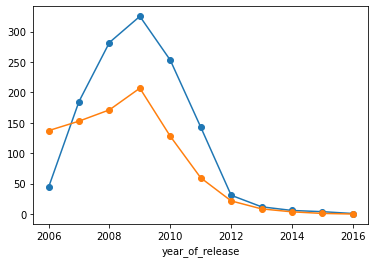

NES


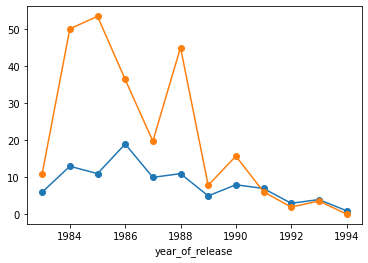

GB


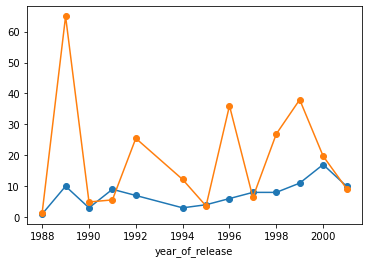

DS


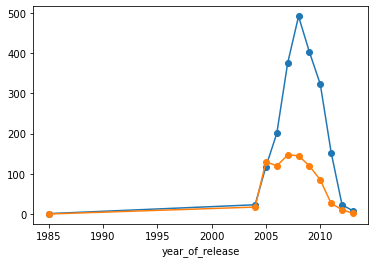

X360


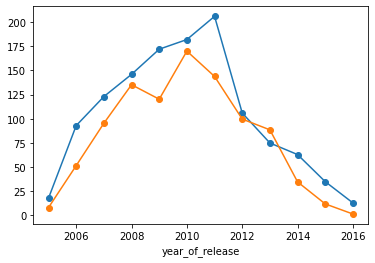

PS3


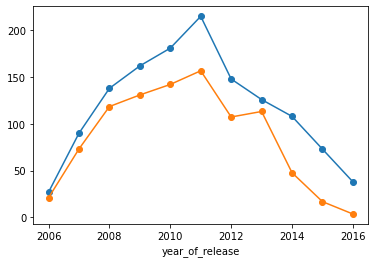

PS2


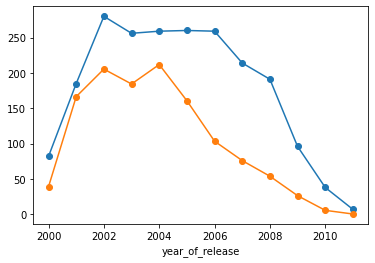

SNES


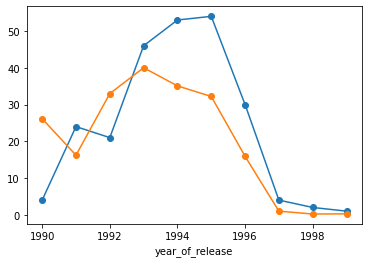

GBA


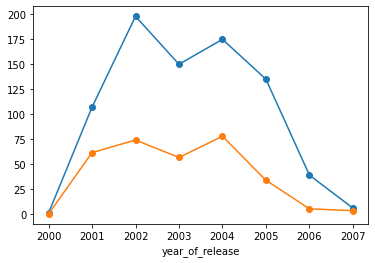

PS4


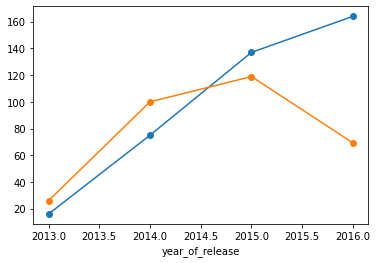

3DS


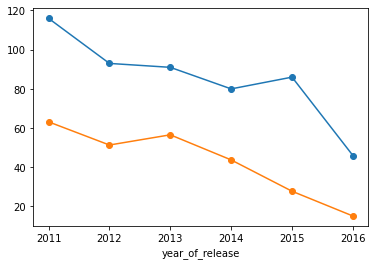

N64


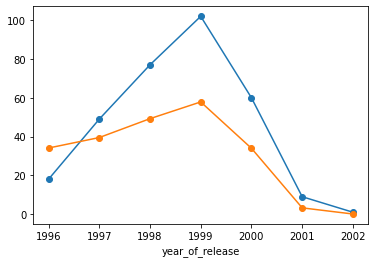

PS


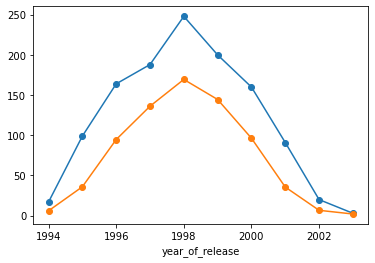

XB


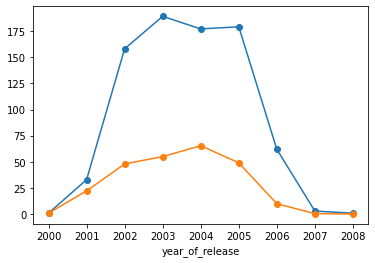

PC


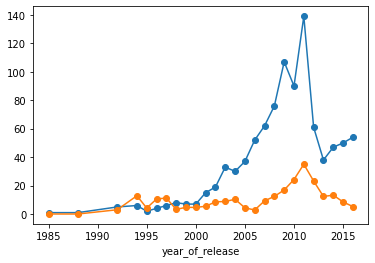

2600


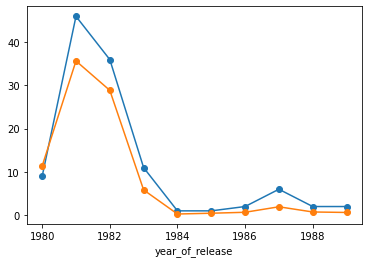

PSP


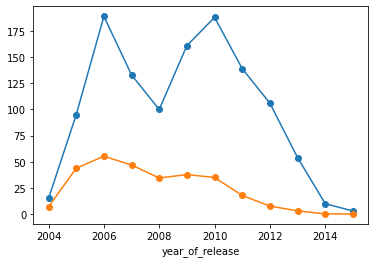

XOne


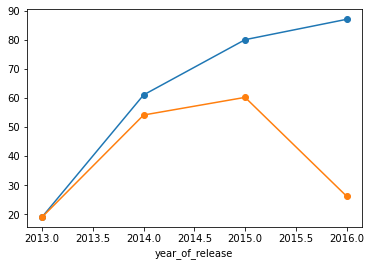

WiiU


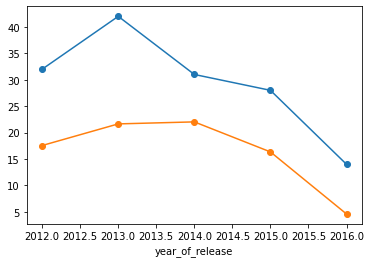

GC


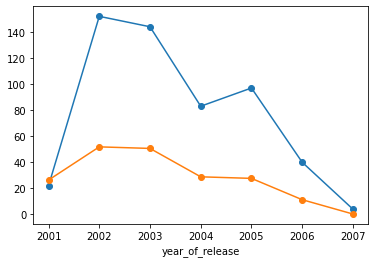

GEN


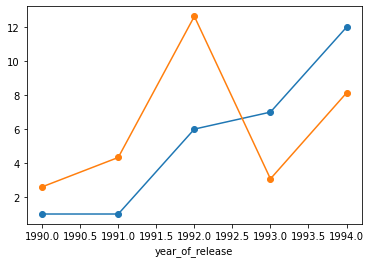

DC


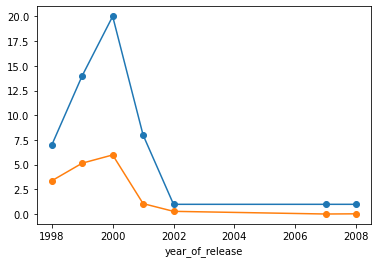

PSV


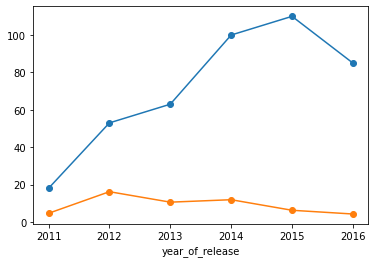

SAT


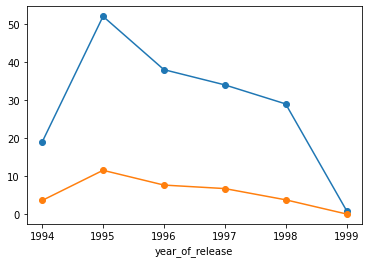

SCD


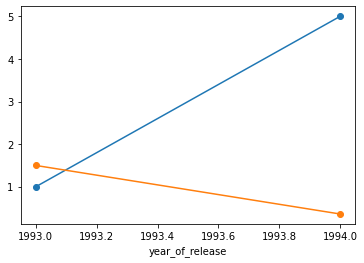

WS


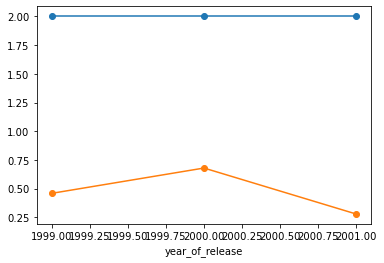

NG


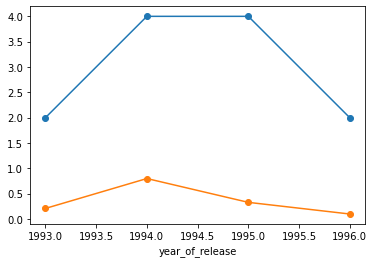

TG16


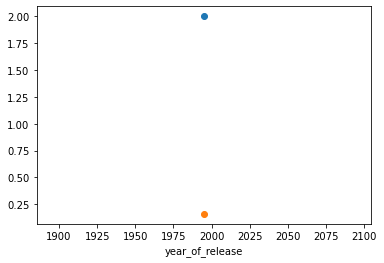

3DO


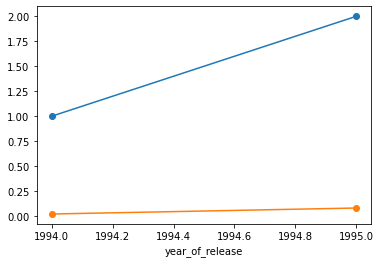

GG


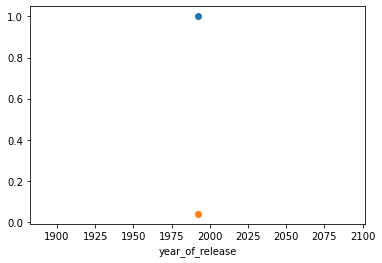

PCFX


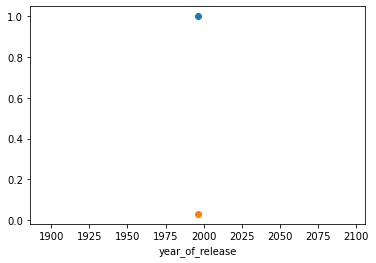

In [69]:
#cantidad de juegos lanzados por las plataformas, ventas totales vs años_gráfica
lista_platform= data_games['platform'].unique()

for platform in lista_platform:
    
    df=data_games[data_games['platform']== platform]
    print(platform)
    df.groupby('year_of_release')['name'].count().plot(kind='line', style='o-')
    df.groupby('year_of_release')['ventas_totales'].sum().plot(kind='line', style='o-')
    plt.show()
 

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Aqui todo bien pero no olvides sobre los nomres para los graficos
    
</div>

<AxesSubplot:>

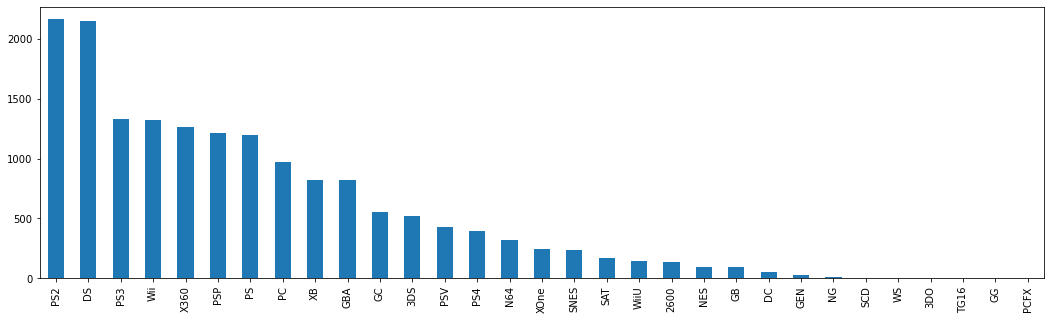

In [70]:
data_games['platform'].value_counts().plot(kind='bar', figsize=(18, 5) ) 

Plataformas con más lanzamiento de juegos: PS2, DS, PS3 , Wii y X360

## Ventas totales

In [71]:
# Distribución estadística de las ventas totales 
data_games.ventas_totales.describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: ventas_totales, dtype: float64

<AxesSubplot:title={'center':'ventas_totales'}, xlabel='platform'>

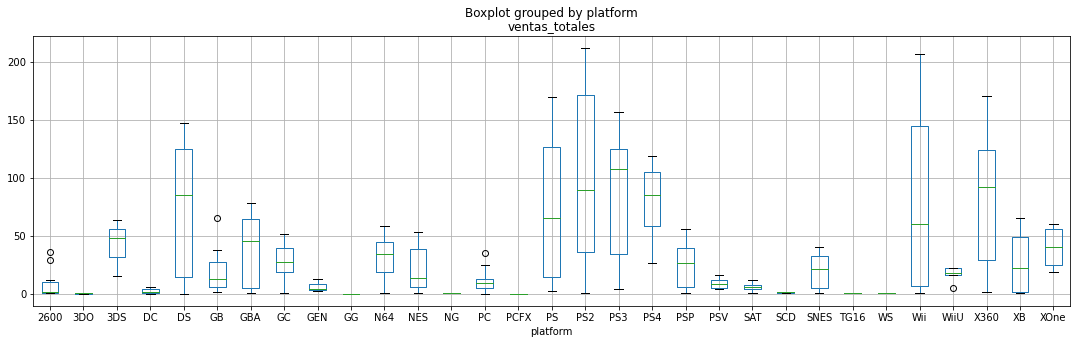

In [73]:
# Diagrama de caja. Distribución estadística de las ventas totales por año  por plataforma
platf_ventas.boxplot(column='ventas_totales', by= 'platform', figsize=(18, 5))

Se observa que las plataformas con mayor distribución en las ventas totales son: DS, PS, PS2, PS3, Wii y X360. Pocas plataformas tienen valores atípicos.


<AxesSubplot:xlabel='year_of_release'>

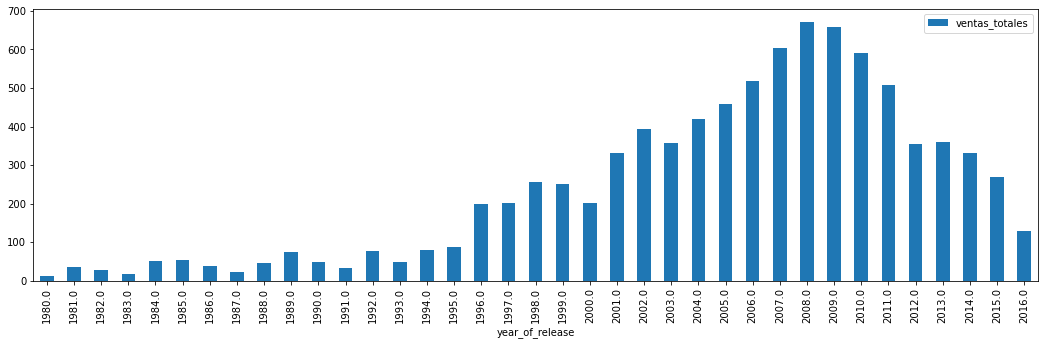

In [74]:
# Distribución  de las ventas totales por año  por plataforma
platf_ventas_t=data_games.pivot_table(index= ('year_of_release'), values= 'ventas_totales', aggfunc= 'sum')
platf_ventas_t=platf_ventas_t.reset_index()
platf_ventas_t.plot(x='year_of_release', y= 'ventas_totales', kind= 'bar', figsize=(18, 5))

En la gráfica de distribución de ventas por año se observa que en la dácada de  los 80 las ventas fueron muy bajas, pues eran los inicios de los videos juegos. Las ventas se despegaron a partir del año 1995, siendo los mejores años de ventas el 2008 y 2009.

<AxesSubplot:xlabel='year_of_release'>

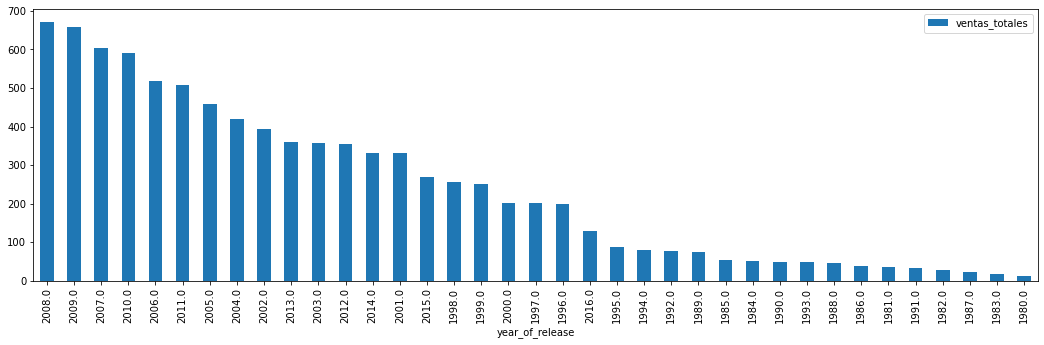

In [75]:
# Distribución estadística de las ventas totales por año  por plataforma
platf_ventas_p=data_games.pivot_table(index= ('year_of_release'), values= 'ventas_totales', aggfunc= 'sum')
platf_ventas_p=platf_ventas_p.reset_index().sort_values(by='ventas_totales', ascending= False)
platf_ventas_p.plot(x='year_of_release', y= 'ventas_totales', kind= 'bar', figsize=(18, 5))

Los 5 años con más ventas, en orden descendente, fueron 2008, 2009, 2007, 2010 y 2006

In [76]:
# distribución de las ventas de las plataformas por año
data_games[(data_games['year_of_release'] == 2008.0) | (data_games['year_of_release'] == 2009.0)].pivot_table(index= ('platform'), columns= 'year_of_release', values= 'ventas_totales', aggfunc= 'sum').head(10)

year_of_release,2008.0,2009.0
platform,,
DC,0.04,NaN
DS,145.31,119.54
PC,12.42,16.91
PS2,53.90,26.40
PS3,118.52,130.93
PSP,34.55,37.78
Wii,171.32,206.97
X360,135.26,120.29
XB,0.18,NaN


La plataforma con más ventas en el año 2008 fue la Wii seguida de la DS. En el 2009 también estuvo en primer lugar en ventas la plataforma Wii seguida de la PS3 

In [77]:
data_games[(data_games['year_of_release'] == 2008.0) | (data_games['year_of_release'] == 2009.0)]['genre'].value_counts(normalize= True, dropna=False)

Action          0.172801
Misc            0.146512
Sports          0.134245
Adventure       0.107256
Simulation      0.084823
Role-Playing    0.075359
Shooter         0.060638
Racing          0.058184
Puzzle          0.050123
Strategy        0.039958
Fighting        0.038205
Platform        0.031896
Name: genre, dtype: float64

Durante los 2 años de más ventas (2008-2009) los géneros más vendidos fueron Acción, Misceláneos y deportes.

<AxesSubplot:>

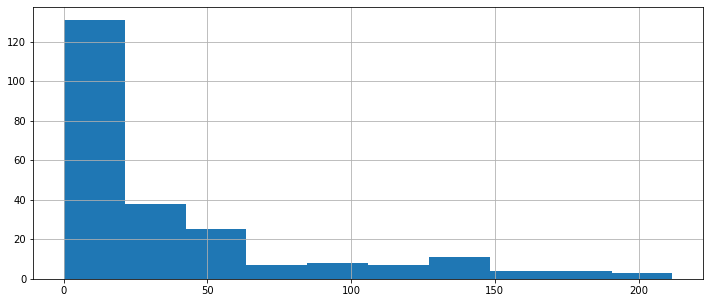

In [78]:
# Distribución estadística de las ventas totales por año  por plataforma_histograma
platf_ventas.ventas_totales.hist(figsize=(12, 5))

La distribución de ventas totales presenta una asimetría positiva, ya que esta totalmente sesgada a la derecha. LA media es de 0.53 musd y la mediana de 0.17 musd

<AxesSubplot:xlabel='year_of_release'>

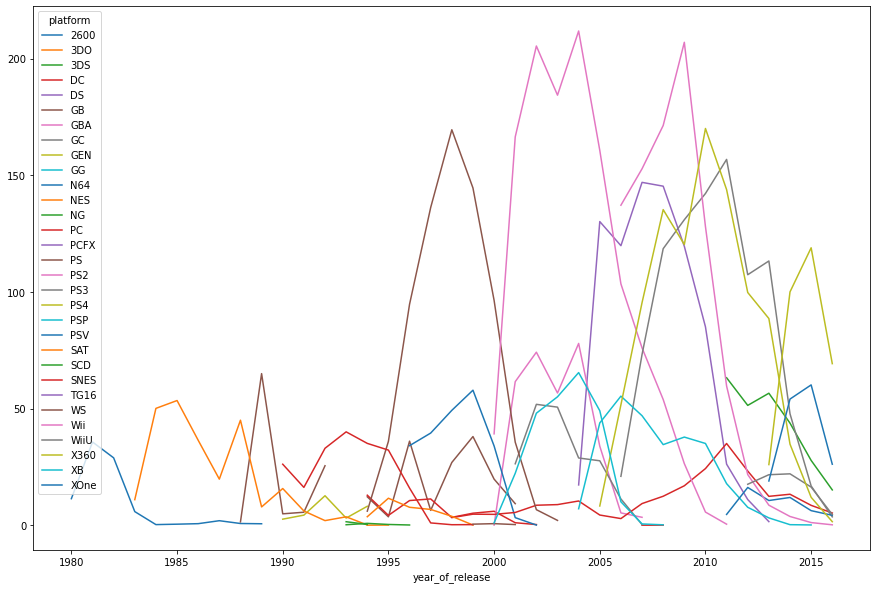

In [80]:
# distribución de las ventas de las plataformas por año
data_games.pivot_table(index= ('year_of_release'), columns= 'platform', values= 'ventas_totales', aggfunc= 'sum').plot(kind='line', figsize= (15,10)) 


In [81]:
#las 10 plataformas con más ventas
platf_mayores_ventas=data_games.pivot_table(index= ( 'platform'), values= 'ventas_totales', aggfunc= 'sum').sort_values(by='ventas_totales', ascending= False).reset_index().head(10)
platf_mayores_ventas

,platform,ventas_totales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Luego de sumar las ventas totales por plataforma se obtuvieron las 10 plataformas con más ventas. Se observa que las 5 primeras plataformas  coinciden con las que lanzaron más juegos, aunque no en el mismo orden

In [82]:
# Nombre de las 10 plataformas con más ventas
platf_mayores_ventas_name= platf_mayores_ventas.platform.unique()
platf_mayores_ventas_name

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'],
      dtype=object)

In [186]:
# Data frame con la información de las plataformas con más ventas
platf_mas_ventas=data_games.query('platform in @ platf_mayores_ventas_name').copy()

In [181]:
#distribución de ventas totales, por año para las 10 plataformas con mas ventas
platf_mas_ventas.pivot_table(index= ('year_of_release'), columns= 'platform', values= 'ventas_totales', aggfunc= 'sum')

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985.0,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992.0,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995.0,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996.0,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997.0,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998.0,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999.0,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year_of_release'>

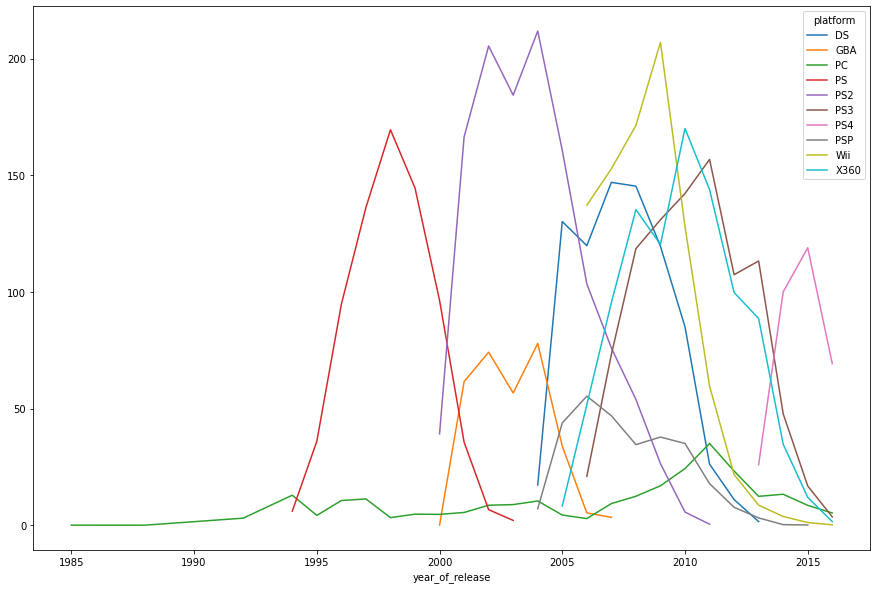

In [84]:
#distribución de ventas totales, por año para las 10 plataformas con más ventas
platf_mas_ventas_grafica= platf_mas_ventas.pivot_table(index= ('year_of_release'), columns= 'platform', values= 'ventas_totales', aggfunc= 'sum')
platf_mas_ventas_grafica.plot(kind='line', figsize= (15,10)) 


De las 10 plataformas con más ventas se observa que PS tuvo las mejores ventas del año 1995 al 2000, seguida de PS2 del 2000 al 2006 y finalmente Wii  que alcanzó sumáximo 2009 y aún entá vigente.

In [97]:
#distribución de las ventas totales , por género y plataforma (10 más vendidas)
platf_mas_ventas.pivot_table(index= (['genre']), columns= 'platform', values= 'ventas_totales', aggfunc= 'sum', margins= True)

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360,All
genre,,,,,,,,,,,
Action,112.58,55.66,31.56,127.02,272.71,301.59,96.10,64.03,114.46,239.65,1415.36
Adventure,45.97,14.63,10.02,20.93,21.24,22.31,6.34,10.67,17.80,14.89,184.80
Fighting,7.08,4.16,0.29,72.74,92.61,51.11,8.65,21.82,23.39,37.32,319.17
Misc,135.64,36.09,8.53,44.88,101.09,46.86,8.19,13.88,216.21,91.57,702.94
Platform,75.83,78.21,0.46,64.22,72.54,29.80,7.69,17.07,88.92,11.29,446.03
Puzzle,82.48,12.81,0.91,12.06,5.94,0.59,0.02,5.45,15.33,0.87,136.46
Racing,38.00,18.81,4.02,103.21,156.39,72.13,12.14,34.33,60.16,64.98,564.17
Role-Playing,124.45,64.20,47.67,78.40,93.55,73.71,28.99,48.90,13.71,71.39,644.97
Shooter,7.86,3.56,45.78,39.33,108.49,192.54,88.56,19.63,28.07,276.92,810.74


Se observa que en la lista de plataformas con más ventas, el género de acción ha sido el más vendido, seguido de deportes, y de disparar en tercer lugar 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Buen trabajo. Debemos ser precavidos con el análisis de correlación. El coeficiente de correlación por defecto del método `corr` es el de Pearson, el cual supone relaciones únicamente lineales. Es posible que las relaciones entre las variables no sean lineales y podamos estar subestimando o sobrestimando el coeficiente. Para solucionar esto podemos hacer uso de las gráficas de dispersión y concluir si, tal vez, es más probable una relación no lineal. En ese caso utilizamos el método de Spearman.
    
</div>

## Análisis del tiempo de vigencia de una plataforma

In [144]:
#Análisis del tiempo de vigencia de las plataforms
tiempo_duracion=data_games.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
tiempo_duracion.columns= ['platform','year_min', 'year_max']
tiempo_duracion['duracion']=tiempo_duracion.year_max-tiempo_duracion.year_min
tiempo_duracion.sort_values(by='duracion', ascending= False)

,platform,year_min,year_max,duracion
13,PC,1985.0,2016.0,31.0
4,DS,1985.0,2013.0,28.0
5,GB,1988.0,2001.0,13.0
28,X360,2005.0,2016.0,11.0
19,PSP,2004.0,2015.0,11.0
16,PS2,2000.0,2011.0,11.0
11,NES,1983.0,1994.0,11.0
3,DC,1998.0,2008.0,10.0
26,Wii,2006.0,2016.0,10.0
17,PS3,2006.0,2016.0,10.0


In [86]:
tiempo_duracion.duracion.describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: duracion, dtype: float64

<AxesSubplot:>

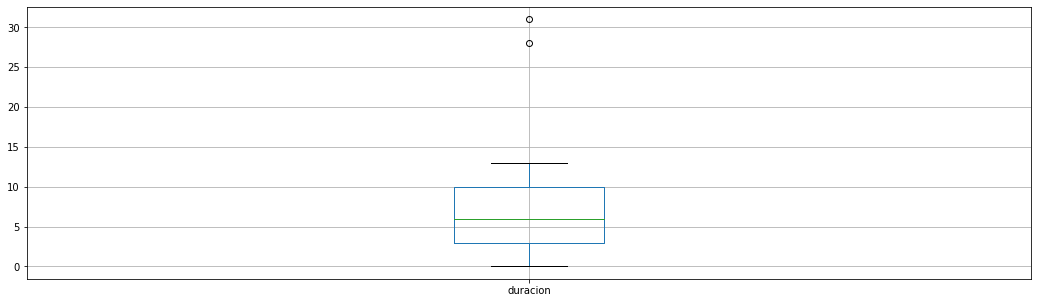

In [87]:
tiempo_duracion.boxplot(column='duracion', figsize=(18, 5))

In [88]:
tiempo_duracion[(tiempo_duracion['platform'] != "PC") & (tiempo_duracion['platform'] !="DS")].duracion.describe()


count    29.000000
mean      6.103448
std       3.967230
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      13.000000
Name: duracion, dtype: float64

Las 5 plataformas más duraderas en orden descente son PC, DS, GB, X360 y PSP. Las que han durado más o más antiguas, no son las que han tenido más ventas. Solo coincide la plataforma DS y X360.

Existen dos valores atípicos en tiempos de duración de la plataforma, y corresponden a la PC y DS. Considerando estas plataformas, el tiempo de vida promedio de las plataformas es de 7.7 años y no más del 50% de las plataformas han durado más de 6 años.

Si se eliminan los dos valores extremos, se tendría una distribución casi normal y el tiempo de vida promedio y mediana  de una plataforma sería de 6 años, y el 75 % de las plataformas no duran más de 10 años en el mercado.



In [157]:
plat_vigentes_2016= tiempo_duracion.query('year_max==2016.0')
plat_vigentes_2016=plat_vigentes_2016.platform
print( 'Número de plataformas vigentes al 2016:', plat_vigentes_2016.shape[0])

Número de plataformas vigentes al 2016: 9


In [272]:
list(plat_vigentes_2016)

['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Buen trabajo!

## Análisis promedio de ventas de las plataformas

In [145]:
# Análisis promedio de ventas de las plataformas
platf_ventas_prom=data_games.pivot_table(index= ( 'platform'), values= 'ventas_totales', aggfunc= 'mean').sort_values(by='ventas_totales', ascending= False)
platf_ventas_prom

,ventas_totales
platform,
GB,2.606735
NES,2.561735
GEN,1.061034
SNES,0.836987
PS4,0.801378
X360,0.769746
2600,0.729173
PS3,0.705973
Wii,0.687508


Cuando se obtiene las ventas promedios por plataforma, se observa que el valor obtenido no es representativo y que para estandarizarlo se debe considerar el tiempo de vigencia de la plataforma

<AxesSubplot:xlabel='platform'>

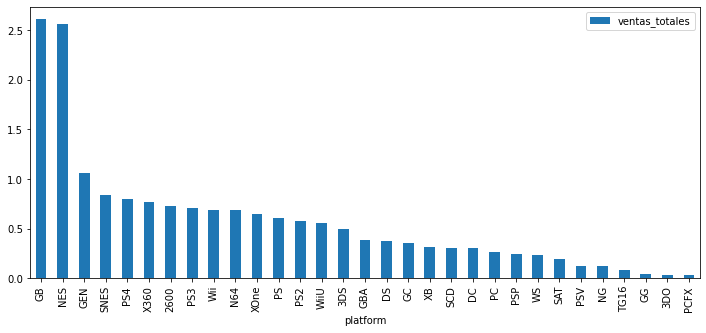

In [91]:
#promedio de ventas de las plataformas
platf_ventas_prom.plot(kind='bar', figsize=(12,5))

La información mostrada de ventas promedio, pareciera no mostrar la realidad de las ventas, pues las plataformas con poca duración estan dando promedios de ventas más altos. Se calculará el tiempo de duración de las plataformas,  las ventas promedios por año y las ventas promedios por cantidad de juegos

In [92]:
#tiempo de antiguedad de las plataformas
tiempo_duracion=data_games.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
tiempo_duracion.columns= ['platform','year_min', 'year_max']
tiempo_duracion['duracion']=tiempo_duracion.year_max-tiempo_duracion.year_min
tiempo_duracion.sort_values(by='duracion', ascending= False)

,platform,year_min,year_max,duracion
13,PC,1985.0,2016.0,31.0
4,DS,1985.0,2013.0,28.0
5,GB,1988.0,2001.0,13.0
28,X360,2005.0,2016.0,11.0
19,PSP,2004.0,2015.0,11.0
16,PS2,2000.0,2011.0,11.0
11,NES,1983.0,1994.0,11.0
3,DC,1998.0,2008.0,10.0
26,Wii,2006.0,2016.0,10.0
17,PS3,2006.0,2016.0,10.0


In [93]:
tiempo_duracion.loc[tiempo_duracion['duracion']==0, 'duracion']=1

Para evitar valores nulos en el calculo de ventas promedio por año, para aquellas plataformas que duraron menos de 1 año, se asumió el valor de antiguedad igual a uno

In [94]:
# cantidad de juegos por plataformas
platf_num_juegos=data_games.pivot_table(index= ( 'platform'), values= 'name', aggfunc= 'count')
platf_num_juegos

,name
platform,
2600,133
3DO,3
3DS,520
DC,52
DS,2151
GB,98
GBA,822
GC,556
GEN,27


In [95]:
# estimación de ventas promedio por año y ventas promedio por num de juegos. LAs 10 mejores plataformas con promedios mas altos en ventas
platf_mayores_ventas=data_games.pivot_table(index= ( 'platform'), values= 'ventas_totales', aggfunc= 'sum').sort_values(by='ventas_totales', ascending= False).reset_index()
ventas_prom_year=tiempo_duracion.merge(platf_mayores_ventas, on='platform', how='left').merge(platf_num_juegos, on='platform', how='left')
ventas_prom_year['ventas_prom_year']=ventas_prom_year['ventas_totales']/ ventas_prom_year['duracion']
ventas_prom_year['ventas_prom_num_juegos']=ventas_prom_year['ventas_totales']/ ventas_prom_year['name']
ventas_prom_year.sort_values(by='ventas_prom_year', ascending= False).head(10)

,platform,year_min,year_max,duracion,ventas_totales,name,ventas_prom_year,ventas_prom_num_juegos
16,PS2,2000.0,2011.0,11.0,1255.77,2161,114.160909,0.581106
18,PS4,2013.0,2016.0,3.0,314.14,392,104.713333,0.801378
17,PS3,2006.0,2016.0,10.0,939.65,1331,93.965000,0.705973
26,Wii,2006.0,2016.0,10.0,907.51,1320,90.751000,0.687508
28,X360,2005.0,2016.0,11.0,971.42,1262,88.310909,0.769746
15,PS,1994.0,2003.0,9.0,730.86,1197,81.206667,0.610576
30,XOne,2013.0,2016.0,3.0,159.32,247,53.106667,0.645020
2,3DS,2011.0,2016.0,5.0,259.00,520,51.800000,0.498077
6,GBA,2000.0,2007.0,7.0,317.85,822,45.407143,0.386679
10,N64,1996.0,2002.0,6.0,218.68,319,36.446667,0.685517


<AxesSubplot:xlabel='platform'>

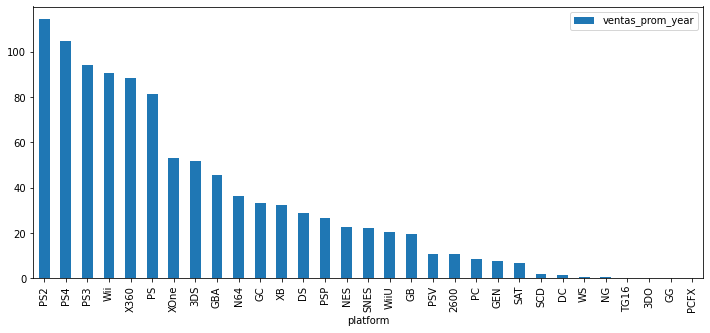

In [96]:
#mejores plataformas con ventas promedio por año
ventas_prom_year.sort_values(by='ventas_prom_year', ascending= False).plot(x='platform', y='ventas_prom_year', kind='bar', figsize=(12,5))


Las 5 plataformas con mejor desempeño, si se observan las ventas totales prom por año serían la PS2, PS4, PS3, Wii y X360. Fijemonos que la plataforma DS, que aparece en el top 5 de las plataformas con mayores ventas, no es aparece en esta lista con los mejores promedios de ventas por año, aparece en el puesto 13 y esto se debe a que es una de las más antiguas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Los conclusiones son correctos pero no olvides sobre los nombres para los graficos!

## Juegos con ventas en más de una plataforma

In [98]:
#Análisis de juegos vendidos por más de una plataforma
platf_mas_ventas

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,years_group,ventas_totales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2000-2009,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2000-2009,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2000-2009,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,2000-2009,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,2000-2009,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2000-2009,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,2000-2009,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2010-2016,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2000-2009,0.01


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Como ves en algunas columnas hay NaN's. Tambien como he dicho antes algunas columnas puedes eliminar para analisis

In [188]:
#platf_mas_ventas.name.str.strip()
platf_mas_ventas.name= platf_mas_ventas.name.map(lambda x: x.replace(' ', '')).str.lower()

In [101]:
platform_comparation = platf_mas_ventas.pivot_table(index='name', columns= 'platform', values='ventas_totales', aggfunc='sum')

platform_comparation= platform_comparation.dropna(thresh=2)

platform_comparation

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
name,,,,,,,,,,
007:quantumofsolace,0.13,NaN,0.02,NaN,0.43,1.15,NaN,NaN,0.65,1.48
11eyes:crossover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,0.02
2010fifaworldcupsouthafrica,NaN,NaN,NaN,NaN,NaN,1.23,NaN,0.46,0.43,0.85
2014fifaworldcupbrazil,NaN,NaN,NaN,NaN,NaN,0.61,NaN,NaN,NaN,0.43
428:fuusasaretashibuyade,NaN,NaN,NaN,NaN,NaN,0.02,NaN,0.04,0.13,NaN
...,...,...,...,...,...,...,...,...,...,...
zapper:onewickedcricket!,NaN,0.14,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN
zoneoftheendershdcollection,NaN,NaN,NaN,NaN,NaN,0.42,NaN,NaN,NaN,0.20
zoohospital,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16,NaN


In [102]:
platform_comparation2 = platf_mas_ventas.pivot_table(index='name', columns= 'platform', values='ventas_totales', aggfunc=['count'])

platform_comparation2 = platform_comparation2.dropna(thresh=2)
platform_comparation2.columns=['DS','GBA','PC','PS','PS2','PS3','PS4','PSP','Wii','X360']
platform_comparation2=platform_comparation2.reset_index() 

platform_comparation2['total']=10-platform_comparation2.isnull().sum(axis=1)
platform_comparation2

,name,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360,total
0,007:quantumofsolace,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,6
1,11eyes:crossover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2
2,2010fifaworldcupsouthafrica,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,4
3,2014fifaworldcupbrazil,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2
4,428:fuusasaretashibuyade,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1904,zapper:onewickedcricket!,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2
1905,zoneoftheendershdcollection,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2
1906,zoohospital,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2
1907,zumbafitness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,3


In [147]:
#revisión de las características del juego con más ventas en diferentes plataformas
platf_mas_ventas.query('name=="007:quantumofsolace"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,years_group,ventas_totales
1285,007:quantumofsolace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T,2000-2009,1.48
1785,007:quantumofsolace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T,2000-2009,1.15
3120,007:quantumofsolace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T,2000-2009,0.65
4475,007:quantumofsolace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN,2000-2009,0.43
9507,007:quantumofsolace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T,2000-2009,0.13
14658,007:quantumofsolace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T,2000-2009,0.02


In [152]:
print( 'Quantum of solace, na_sales:', platf_mas_ventas.query('name=="007:quantumofsolace"')['na_sales'].sum())
print( 'Quantum of solace, eu_sales:', platf_mas_ventas.query('name=="007:quantumofsolace"')['eu_sales'].sum())
print( 'Quantum of solace, jp_sales:', platf_mas_ventas.query('name=="007:quantumofsolace"')['jp_sales'].sum())
print( 'Quantum of solace, others_sales:', platf_mas_ventas.query('name=="007:quantumofsolace"')['other_sales'].sum())

Quantum of solace, na_sales: 1.83
Quantum of solace, eu_sales: 1.32
Quantum of solace, jp_sales: 0.04
Quantum of solace, others_sales: 0.67


El juego quantum of solace es un juego de acción para niños menores de 13 años, y es el juego más vendido por más de una plataforma , se vendió en 6 plataformas distintas en el 2008,  teniendo las mayores ventas la X360 en la Región de Norteamérica y Europa. La región donde se vendió más este juego por todas las plataformas fue Norteamérica.


In [153]:
#revisión de las características del segundo juego con más ventas en diferentes plataformas
platf_mas_ventas.query('name=="2010fifaworldcupsouthafrica"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,years_group,ventas_totales
1634,2010fifaworldcupsouthafrica,PS3,2010.0,Sports,0.30,0.64,0.07,0.22,82.0,7.8,E,2010-2016,1.23
2429,2010fifaworldcupsouthafrica,X360,2010.0,Sports,0.32,0.42,0.02,0.09,83.0,8.1,E,2010-2016,0.85
4211,2010fifaworldcupsouthafrica,PSP,2010.0,Sports,0.09,0.22,0.03,0.12,69.0,7.4,E,2010-2016,0.46
4579,2010fifaworldcupsouthafrica,Wii,2010.0,Sports,0.23,0.15,0.01,0.04,70.0,6.7,E,2010-2016,0.43


In [155]:
print( 'Fifa World Cup Sud, na_sales:', platf_mas_ventas.query('name=="2010fifaworldcupsouthafrica"')['na_sales'].sum())
print( 'Fifa World Cup Sud, eu_sales:', platf_mas_ventas.query('name=="2010fifaworldcupsouthafrica"')['eu_sales'].sum())
print( 'Fifa World Cup Sud, jp_sales:', platf_mas_ventas.query('name=="2010fifaworldcupsouthafrica"')['jp_sales'].sum())
print( 'Fifa World Cup Sud, others_sales:', platf_mas_ventas.query('name=="2010fifaworldcupsouthafrica"')['other_sales'].sum())

Fifa World Cup Sud, na_sales: 0.94
Fifa World Cup Sud, eu_sales: 1.43
Fifa World Cup Sud, jp_sales: 0.13
Fifa World Cup Sud, others_sales: 0.47


El juego Fifa World Cup Sudáfrica es un juego de deporte para todo público, y es el segundo juego más vendido por más de una plataforma en el año 2010 , se vendió en 4 plataformas distintas, teniendo las mayores ventas la PS3 en la Región de Europa. La región donde se vendió más este juego por todas las plataformas fue Europa.

## Relación ventas totales con critic_score y user score

<AxesSubplot:xlabel='critic_score', ylabel='ventas_totales'>

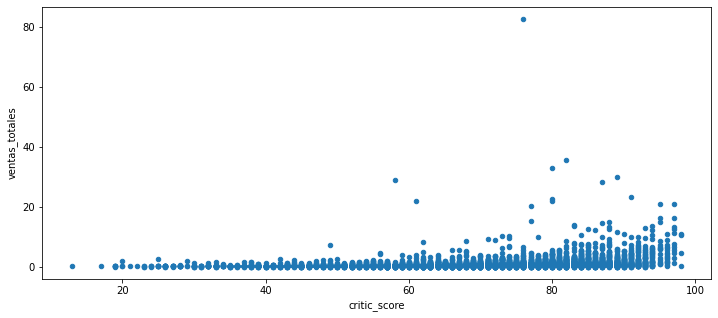

In [103]:
# relación de ventas totales con puntuación de los críticos
data_games.plot(x='critic_score', y='ventas_totales', kind='scatter', figsize= (12,5)) 

In [223]:
#relación de las variables ventas_totales y critic_score
data_games['ventas_totales'].dropna().corr(data_games['critic_score'].dropna())

0.24550668717736326

Existe una relación directa, pero baja,  entre las variables critic_score y ventas_totales. Es decir, mientras las puntuación del juego es mayor las ventas aumentan.

In [104]:
#relación de la puntuación de los críticos y la puntuación de los usuarios
data_games.user_score.replace("tbd", np.nan, inplace= True)
data_games.user_score= data_games.user_score.astype('float')

<AxesSubplot:xlabel='critic_score', ylabel='user_score'>

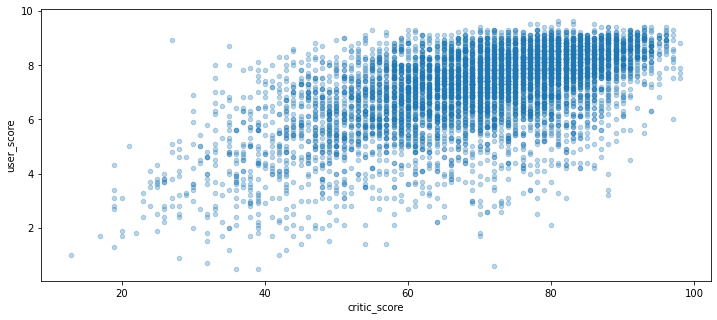

In [105]:
data_games.plot(x='critic_score', y='user_score', kind='scatter', alpha=0.3, figsize= (12,5)) 

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Estaria mejor si anades algunos conclusiones

In [224]:
#relación de la puntuación de los críticos y la puntuación de los usuarios
data_games['user_score'].dropna().corr(data_games['critic_score'].dropna())

0.5808778320767239

También se observa una relación directa y más alta o marcada entre las variables critic_score y user score, es decir que mientras las puntuación de los críticos es más alta, también lo es la puntuación de los usuarios.

# Crea un perfil de usuario para cada región

In [106]:
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,years_group,ventas_totales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2000-2009,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1980-1989,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2000-2009,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2000-2009,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1990-1999,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2010-2016,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2000-2009,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2010-2016,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2000-2009,0.01


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Bien pero piensa si necesitas todas columnas aqui, por favor

## Perfil Región Europa

In [107]:
eu_sales=data_games[data_games['eu_sales']>0]
eu_sales_cuota=eu_sales.pivot_table(index='platform', values='eu_sales' , aggfunc= 'sum').reset_index()
eu_sales_total= sum(eu_sales_cuota.eu_sales)
eu_sales_cuota['composicion_%']= (eu_sales_cuota.eu_sales/ eu_sales_total)*100
eu_sales_cuota

,platform,eu_sales,composicion_%
0,2600,5.47,0.225598
1,3DS,61.48,2.535603
2,DC,1.69,0.069700
3,DS,188.89,7.790338
4,GB,47.82,1.972227
5,GBA,75.25,3.103515
6,GC,38.71,1.596506
7,GEN,6.05,0.249518
8,N64,41.06,1.693426
9,NES,21.15,0.872284


De la información que se tiene de 1985 a 2016, se tiene que las 10 plataformas que aportaron más a las ventas totales, en orden descendente,  de la Región de Europa son: PS2, PS3,X360, Wii, PS, DS, PC, PS4, GBA Y PSP.

In [108]:
platf_vigentes_2016_eu=eu_sales_cuota.query('platform in @ plat_vigentes_2016')
platf_vigentes_2016_eu

,platform,eu_sales,composicion_%
1,3DS,61.48,2.535603
10,PC,142.44,5.874614
13,PS3,330.29,13.622060
14,PS4,141.09,5.818936
16,PSV,13.12,0.541105
20,Wii,262.21,10.814255
21,WiiU,25.13,1.036430
22,X360,270.76,11.166880
24,XOne,51.59,2.127712


De las plataformas que aún estaban vigentes al 2016, las que más aportaron a las ventas en orden descendente son: PS3, X360, Wii, PC, PS4, 3DS, Xone, Wiiu y PSV.

In [109]:
print('Ventas eu:', eu_sales_total )

Ventas eu: 2424.67


In [110]:
eu_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 16711
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10844 non-null  object 
 1   platform         10845 non-null  object 
 2   year_of_release  10679 non-null  float64
 3   genre            10844 non-null  object 
 4   na_sales         10845 non-null  float64
 5   eu_sales         10845 non-null  float64
 6   jp_sales         10845 non-null  float64
 7   other_sales      10845 non-null  float64
 8   critic_score     6845 non-null   float64
 9   user_score       6496 non-null   float64
 10  rating           7816 non-null   object 
 11  years_group      10845 non-null  object 
 12  ventas_totales   10845 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1.2+ MB


In [111]:
eu_sales.eu_sales.describe()

count    10845.000000
mean         0.223575
std          0.610684
min          0.010000
25%          0.020000
50%          0.070000
75%          0.200000
max         28.960000
Name: eu_sales, dtype: float64

<AxesSubplot:>

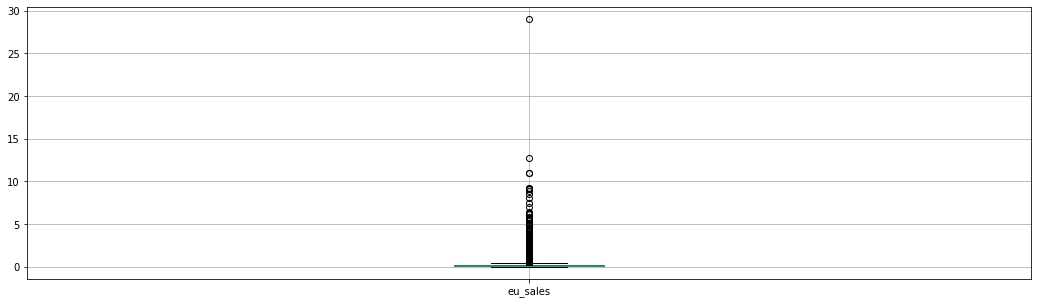

In [228]:
eu_sales.boxplot(column='eu_sales', figsize=(18, 5))

<AxesSubplot:>

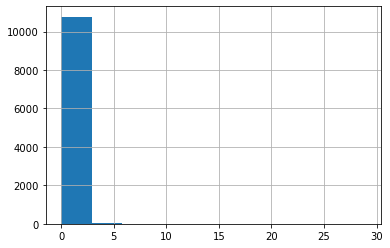

In [234]:
eu_sales.eu_sales.hist()

La distribución de las ventas en la Región de Europa tiene una asimetría positiva, esta muy sesgada a la derecha, los valores de ventas se concentran para en los valores entre 0 y 2.5 musd.

In [112]:
eu_sales['genre'].value_counts(normalize= True,dropna=False)

Action          0.226279
Sports          0.144122
Shooter         0.100415
Racing          0.094053
Misc            0.087967
Role-Playing    0.071923
Platform        0.066943
Fighting        0.049885
Simulation      0.046657
Adventure       0.045920
Strategy        0.037990
Puzzle          0.027755
NaN             0.000092
Name: genre, dtype: float64

Los tres géneros más vendidos son: acción, deportes y juegos de disparos.

In [113]:
eu_sales['rating'].value_counts(normalize= True,dropna=False)

NaN     0.279299
E       0.264269
T       0.224435
M       0.134532
E10+    0.096634
K-A     0.000277
RP      0.000277
EC      0.000184
AO      0.000092
Name: rating, dtype: float64

In [273]:
eu_sales['user_score'].describe()

count    6496.000000
mean        7.200600
std         1.446891
min         0.200000
25%         6.500000
50%         7.500000
75%         8.300000
max         9.700000
Name: user_score, dtype: float64

In [274]:
eu_sales['critic_score'].describe()

count    6845.000000
mean       70.271585
std        13.470665
min        13.000000
25%        62.000000
50%        72.000000
75%        80.000000
max        98.000000
Name: critic_score, dtype: float64

En cuanto al rating, se observa que la mayoría de los juegos no tiene esta evaluación, seguida de todo público y juegos para menores de 13 años.

En cuanto a la puntuación de los usuarios y de los críticos es buena y  la mediana es de 7.5 para el user score y 72 para critic_score.

**Analisis con las plataformas vigentes @2016:**

In [114]:
eu_sales_mod=eu_sales.query('platform in @ plat_vigentes_2016')

In [115]:
eu_sales_mod['genre'].value_counts(normalize= True,dropna=False)

Action          0.277573
Sports          0.122860
Shooter         0.121560
Misc            0.090141
Role-Playing    0.081473
Racing          0.070423
Strategy        0.051138
Simulation      0.050054
Adventure       0.047454
Fighting        0.038787
Platform        0.035320
Puzzle          0.013218
Name: genre, dtype: float64

In [116]:
eu_sales_mod['rating'].value_counts(normalize= True,dropna=False)

T       0.253088
M       0.213868
E       0.200867
NaN     0.188299
E10+    0.142795
RP      0.000650
K-A     0.000433
Name: rating, dtype: float64

Si solo se revisa la información de los juegos en donde las plataformas están vigentes al 2016, se observa que la tendencia del género se mantiene, mientras que el rating cambia ligeramente, ocupando el primer lugar los juegos recomendados para menores de 13 años y, seguido lo juegos para personas menores de 17.

## Perfil Región Norteamérica

In [117]:
na_sales=data_games[data_games['na_sales']>0]
na_sales_cuota=na_sales.pivot_table(index='platform', values='na_sales' , aggfunc= 'sum').reset_index()
na_sales_total= sum(na_sales_cuota.na_sales)
na_sales_cuota['composicion_%']= (na_sales_cuota.na_sales/ na_sales_total)*100
na_sales_cuota

,platform,na_sales,composicion_%
0,2600,90.60,2.057992
1,3DS,83.49,1.896487
2,DC,5.43,0.123343
3,DS,382.40,8.686270
4,GB,114.32,2.596795
5,GBA,187.54,4.259998
6,GC,133.46,3.031563
7,GEN,21.05,0.478154
8,N64,139.02,3.157859
9,NES,125.94,2.860745


De la información que se tiene de 1985 a 2016, se tiene que las 10 plataformas que aportaron más a las ventas totales, en orden descendente,  son: X360, PS2,  Wii, PS3, DS, PS, GBA, XB, N64,GC


In [118]:
platf_vigentes_2016_na=na_sales_cuota.query('platform in @ plat_vigentes_2016')
platf_vigentes_2016_na

,platform,na_sales,composicion_%
1,3DS,83.49,1.896487
10,PC,94.53,2.147262
13,PS3,393.49,8.938181
14,PS4,108.74,2.470044
16,PSV,12.58,0.285756
20,Wii,496.90,11.287153
21,WiiU,38.10,0.865447
22,X360,602.47,13.685191
24,XOne,93.12,2.115234


De las plataformas que aún estaban vigentes al 2016, las que más aportaron a las ventas en orden descendente son: 3DS, PC, PS3, PS4, PSV, Wii, Wiiu, X360 Y XOne

In [247]:
print('Ventas na:', round(na_sales_total,2) )

Ventas na: 4402.35


In [120]:
na_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12207 entries, 0 to 16713
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12206 non-null  object 
 1   platform         12207 non-null  object 
 2   year_of_release  11996 non-null  float64
 3   genre            12206 non-null  object 
 4   na_sales         12207 non-null  float64
 5   eu_sales         12207 non-null  float64
 6   jp_sales         12207 non-null  float64
 7   other_sales      12207 non-null  float64
 8   critic_score     7506 non-null   float64
 9   user_score       6901 non-null   float64
 10  rating           9173 non-null   object 
 11  years_group      12207 non-null  object 
 12  ventas_totales   12207 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1.3+ MB


In [121]:
na_sales.na_sales.describe()

count    12207.000000
mean         0.360641
std          0.933459
min          0.010000
25%          0.060000
50%          0.140000
75%          0.340000
max         41.360000
Name: na_sales, dtype: float64

<AxesSubplot:>

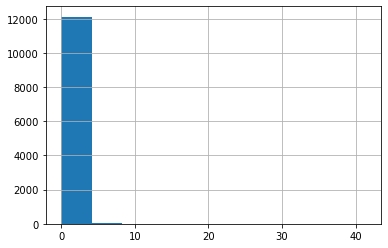

In [235]:
na_sales.na_sales.hist()

La distribución de las ventas en la Región de Norteamérica tiene una asimetría positiva, esta muy sesgada a la derecha, los valores de ventas se concentran para en los valores entre 0 y 5 musd.

In [122]:
na_sales['genre'].value_counts(normalize= True,dropna=False)

Action          0.214385
Sports          0.152454
Misc            0.099943
Shooter         0.095355
Racing          0.090440
Role-Playing    0.071598
Platform        0.066028
Simulation      0.050954
Fighting        0.048906
Adventure       0.045302
Puzzle          0.036618
Strategy        0.027935
NaN             0.000082
Name: genre, dtype: float64

Los tres géneros más vendidos son: acción, deportes y Misceláneos.

In [123]:
na_sales['rating'].value_counts(normalize= True,dropna=False)

E       0.308102
NaN     0.248546
T       0.217089
M       0.116572
E10+    0.108790
EC      0.000655
K-A     0.000164
AO      0.000082
Name: rating, dtype: float64

In [275]:
na_sales['user_score'].describe()

count    6901.000000
mean        7.119780
std         1.505572
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.600000
Name: user_score, dtype: float64

In [276]:
na_sales['critic_score'].describe()

count    7506.000000
mean       68.691847
std        14.046094
min        13.000000
25%        60.000000
50%        70.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

En cuanto al rating, se observa que la mayoría de los juegos tiene evaluación para todo público seguido de los que no tiene esta evaluación.

En cuanto a la puntuación de los usuarios y de los criticos es buena y la mediana es de 7.5 para el user score y 79 para critic_score.

**Analisis con las plataformas vigentes @2016:**

In [124]:
na_sales_mod=na_sales.query('platform in @ plat_vigentes_2016')

In [125]:
na_sales_mod['genre'].value_counts(normalize= True,dropna=False)

Action          0.266386
Sports          0.146681
Shooter         0.122023
Misc            0.108957
Role-Playing    0.075869
Racing          0.067650
Simulation      0.044889
Fighting        0.042360
Adventure       0.042360
Platform        0.037724
Strategy        0.028030
Puzzle          0.017071
Name: genre, dtype: float64

In [126]:
na_sales_mod['rating'].value_counts(normalize= True,dropna=False)

T       0.248051
E       0.245522
M       0.193678
E10+    0.161433
NaN     0.150263
EC      0.000843
K-A     0.000211
Name: rating, dtype: float64

Si solo se revisa la información de los juegos en donde las plataformas están vigentes al 2016, se observa que la tendencia del género cambia ligeramente y el género de juegos de disparos pasa a tercer lugar, mientras que el rating cambia ligeramente, ocupando el primer lugar los juegos recomendados para menores de 13 años y, seguido lo juegos para todo público

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Buenos conclusiones!

## Perfil Región Japón

In [127]:
jp_sales=data_games[data_games['jp_sales']>0]
jp_sales_cuota=jp_sales.pivot_table(index='platform', values='jp_sales' , aggfunc= 'sum').reset_index()
jp_sales_total= sum(jp_sales_cuota.jp_sales)
jp_sales_cuota['composicion_%']= (jp_sales_cuota.jp_sales/ jp_sales_total)*100
jp_sales_cuota

,platform,jp_sales,composicion_%
0,3DO,0.10,0.007708
1,3DS,100.67,7.759544
2,DC,8.56,0.659796
3,DS,175.57,13.532762
4,GB,85.12,6.560966
5,GBA,47.33,3.648150
6,GC,21.58,1.663365
7,GEN,2.70,0.208113
8,GG,0.04,0.003083
9,N64,34.22,2.637644


De la información que se tiene de 1985 a 2016, se tiene que las 10 plataformas que aportaron más a las ventas totales, en orden descendente,  son: DS, PS, PS2, SNES, 3DS,NES, GB, PS3, PSP, Wii.

In [128]:
platf_vigentes_2016_jp=jp_sales_cuota.query('platform in @ plat_vigentes_2016')
platf_vigentes_2016_jp

,platform,jp_sales,composicion_%
1,3DS,100.67,7.759544
12,PC,0.17,0.013103
16,PS3,80.19,6.180966
17,PS4,15.96,1.230181
19,PSV,21.91,1.688801
25,Wii,69.33,5.343888
26,WiiU,13.01,1.002798
27,X360,12.43,0.958092
29,XOne,0.34,0.026207


De las plataformas que aún estaban vigentes al 2016, las que más aportaron a las ventas en orden descendente son: 3DS, PC, PS3, PS4, PSV, Wii, Wiiu, X360 y XOne. Estas plataformas son las mismas que la región de Norteamérica.

In [246]:
print('Ventas jp:', round(jp_sales_total,2) )

Ventas jp: 1297.37


In [130]:
jp_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6201 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6200 non-null   object 
 1   platform         6201 non-null   object 
 2   year_of_release  6145 non-null   float64
 3   genre            6200 non-null   object 
 4   na_sales         6201 non-null   float64
 5   eu_sales         6201 non-null   float64
 6   jp_sales         6201 non-null   float64
 7   other_sales      6201 non-null   float64
 8   critic_score     2094 non-null   float64
 9   user_score       2119 non-null   float64
 10  rating           2203 non-null   object 
 11  years_group      6201 non-null   object 
 12  ventas_totales   6201 non-null   float64
dtypes: float64(8), object(5)
memory usage: 678.2+ KB


In [237]:
jp_sales.jp_sales.describe()

count    6201.000000
mean        0.209219
std         0.479183
min         0.010000
25%         0.030000
50%         0.070000
75%         0.190000
max        10.220000
Name: jp_sales, dtype: float64

<AxesSubplot:>

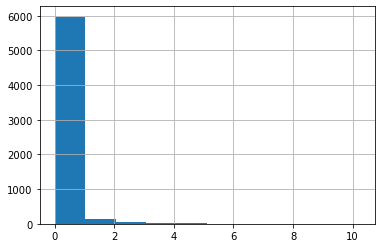

In [238]:
jp_sales.jp_sales.hist()

La distribución de las ventas en la Región de Japón tiene una asimetría positiva, esta muy sesgada a la derecha, los valores de ventas se concentran para en los valores entre 0 y 1 musd.

In [132]:
jp_sales['genre'].value_counts(normalize= True,dropna=False)

Action          0.192550
Role-Playing    0.171101
Adventure       0.121432
Sports          0.096920
Misc            0.087083
Fighting        0.075149
Shooter         0.061280
Platform        0.044509
Strategy        0.043864
Simulation      0.043703
Racing          0.037091
Puzzle          0.025157
NaN             0.000161
Name: genre, dtype: float64

In [277]:
jp_sales['user_score'].describe()

count    2119.000000
mean        7.523360
std         1.165112
min         1.700000
25%         7.000000
50%         7.800000
75%         8.300000
max         9.600000
Name: user_score, dtype: float64

In [278]:
jp_sales['critic_score'].describe()

count    2094.000000
mean       74.668577
std        11.799852
min        32.000000
25%        68.000000
50%        76.000000
75%        83.000000
max        98.000000
Name: critic_score, dtype: float64

Los tres géneros más vendidos son acción, juego de rol y aventuras

En cuanto a la puntuación de los usuarios y de los críticos es buena y  la mediana es de 7.8 para el user score y 76 para critic_score.

In [133]:
jp_sales['rating'].value_counts(normalize= True,dropna=False)

NaN     0.644735
T       0.136591
E       0.092243
M       0.088373
E10+    0.037897
K-A     0.000161
Name: rating, dtype: float64

Una gran parte (64%)de los juegos no tienen evaluación de rating

**Analisis con las plataformas vigentes @2016:**

In [134]:
jp_sales_mod=jp_sales.query('platform in @ plat_vigentes_2016')

In [135]:
jp_sales_mod['genre'].value_counts(normalize= True,dropna=False)

Action          0.302122
Role-Playing    0.164378
Shooter         0.103204
Adventure       0.087391
Sports          0.077403
Misc            0.068248
Fighting        0.062838
Racing          0.038702
Simulation      0.031211
Platform        0.029130
Strategy        0.025385
Puzzle          0.009988
Name: genre, dtype: float64

In [136]:
jp_sales_mod['rating'].value_counts(normalize= True,dropna=False)

NaN     0.449854
T       0.207657
M       0.187266
E       0.100707
E10+    0.054515
Name: rating, dtype: float64

In [137]:
jp_sales_mod[jp_sales_mod.rating.isna()]['platform'].value_counts(normalize= True,dropna=False)

PSV     0.246068
PS3     0.234043
3DS     0.226642
Wii     0.112858
PS4     0.086031
X360    0.070305
WiiU    0.020352
XOne    0.003700
Name: platform, dtype: float64

Si solo se analiza la información de las plataformas vigentes al 2016, se observa que el comportamiento cambia ligeramente y pasa a tercer lugar los juegos de disparos. Los dos primeros puestos en cuanto al rating, no variaron.

Si se analiza cual es la plataforma con mayores valores nulos en el rating, se observa que el primer lugar es para la plataforma PSV, seguido de PS3 que aún estaban activas para el 2016.

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Genial!

## Análisis de composicion de ventas :

In [138]:
ventas_totales_na_eu_jp= jp_sales_total+ na_sales_total + eu_sales_total

In [250]:
print('Cuota de ventas eu', round((eu_sales_total/ventas_totales_na_eu_jp)*100))
print('Cuota de ventas na', round((na_sales_total/ventas_totales_na_eu_jp)*100))
print('Cuota de ventas jp', round((jp_sales_total/ventas_totales_na_eu_jp)*100))

Cuota de ventas eu 30
Cuota de ventas na 54
Cuota de ventas jp 16


In [241]:
round(sum(data_games.other_sales),2)

791.32

La Región que más aporta en la venta de video juegos (considerando la venta de las Regiones) es Nortemárica, seguido de Europa y finalmente Japón.

**Analisis ventas plataformas vigentes @2016:**

In [141]:
platf_vigentes_2016_eu= platf_vigentes_2016_eu.drop(['composicion_%'], axis=1)
platf_vigentes_2016_na= platf_vigentes_2016_na.drop(['composicion_%'], axis=1)
platf_vigentes_2016_jp= platf_vigentes_2016_jp.drop(['composicion_%'], axis=1)

In [142]:
platf_vigentes_2016=platf_vigentes_2016_eu.merge(platf_vigentes_2016_na, on='platform', how= 'outer').merge(platf_vigentes_2016_jp, on ='platform', how= 'outer')
platf_vigentes_2016['ventas_total']=platf_vigentes_2016.eu_sales+ platf_vigentes_2016.na_sales+ platf_vigentes_2016.jp_sales 
platf_vigentes_2016

,platform,eu_sales,na_sales,jp_sales,ventas_total
0,3DS,61.48,83.49,100.67,245.64
1,PC,142.44,94.53,0.17,237.14
2,PS3,330.29,393.49,80.19,803.97
3,PS4,141.09,108.74,15.96,265.79
4,PSV,13.12,12.58,21.91,47.61
5,Wii,262.21,496.90,69.33,828.44
6,WiiU,25.13,38.10,13.01,76.24
7,X360,270.76,602.47,12.43,885.66
8,XOne,51.59,93.12,0.34,145.05


In [143]:
platf_vigentes_2016['cuota_eu']= (platf_vigentes_2016['eu_sales']/ platf_vigentes_2016['ventas_total'])*100
platf_vigentes_2016['cuota_na']= (platf_vigentes_2016['na_sales']/ platf_vigentes_2016['ventas_total'])*100
platf_vigentes_2016['cuota_jp']= (platf_vigentes_2016['jp_sales']/ platf_vigentes_2016['ventas_total'])*100
platf_vigentes_2016

,platform,eu_sales,na_sales,jp_sales,ventas_total,cuota_eu,cuota_na,cuota_jp
0,3DS,61.48,83.49,100.67,245.64,25.028497,33.988764,40.982739
1,PC,142.44,94.53,0.17,237.14,60.065784,39.862528,0.071688
2,PS3,330.29,393.49,80.19,803.97,41.082379,48.943369,9.974253
3,PS4,141.09,108.74,15.96,265.79,53.083261,40.911998,6.004741
4,PSV,13.12,12.58,21.91,47.61,27.557236,26.423020,46.019744
5,Wii,262.21,496.90,69.33,828.44,31.651055,59.980204,8.368741
6,WiiU,25.13,38.10,13.01,76.24,32.961700,49.973767,17.064533
7,X360,270.76,602.47,12.43,885.66,30.571551,68.024976,1.403473
8,XOne,51.59,93.12,0.34,145.05,35.567046,64.198552,0.234402


De las plataformas que estan vigentes al 2016 para todas las regiones, la X360 es la que ha aportado más a las ventas, teniendo el 68% de las ventas en la región de Norteamérica. La segunda y tercera plataforma con más ventas son Wii y PS3 con el casi 60% y 49% respectivamente de las ventas en Norteamérica. La plataforma que más aporta en Europa es la PC con el 60% de las ventas  seguido del PS4 con el 53% de las ventas en esta Región. En japón la plataforma que más aporta es la PSV con 3l 46% seguido del 3DS con el 41%.

# Hipótesis 1

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

H0= promedio user_score plataforma XOne = promedio user_score plataforma PC

H1= promedio user_score plataforma XOne es igual el promedio user_score plataforma PC

In [196]:
usuarios_xbox= data_games.query('platform== "XOne"')
usuarios_xbox

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,years_group,ventas_totales
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,2010-2016,7.39
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,2010-2016,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,2010-2016,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,2010-2016,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,2010-2016,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,2010-2016,0.01
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,2010-2016,0.01
16645,ZombiU,XOne,2016.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2010-2016,0.01
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,2010-2016,0.01


In [193]:
data_games.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [213]:
user_score_Xone= usuarios_xbox['user_score'].dropna()

In [198]:
usuarios_PC= data_games.query('platform== "PC"')
usuarios_PC

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,years_group,ventas_totales
85,The Sims 3,PC,2009.0,Simulation,0.99,6.42,0.0,0.60,86.0,7.6,T,2000-2009,8.01
138,World of Warcraft,PC,2004.0,Role-Playing,0.08,6.21,0.0,0.00,93.0,7.3,T,2000-2009,6.29
192,Diablo III,PC,2012.0,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,2010-2016,5.14
195,Microsoft Flight Simulator,PC,1996.0,Simulation,3.22,1.69,0.0,0.20,NaN,NaN,NaN,1990-1999,5.11
218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,2.57,1.68,0.0,0.58,93.0,8.2,T,2010-2016,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,Pony Friends 2,PC,2009.0,Simulation,0.00,0.01,0.0,0.00,NaN,NaN,NaN,2000-2009,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.0,0.00,80.0,7.6,M,2010-2016,0.01
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.0,0.00,61.0,5.8,T,2010-2016,0.01
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.0,0.00,60.0,7.2,E10+,2010-2016,0.01


In [214]:
user_score_PC= usuarios_PC['user_score'].dropna()

In [215]:
alpha = 0.05 

results = st.ttest_ind(user_score_PC, user_score_Xone)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula ")
else:
    print("No se puede rechazar la hipótesis nula") 

p-value:  1.3896435533548819e-05
Rechazamos la hipótesis nula 


In [220]:
st.levene(user_score_PC, user_score_Xone)

LeveneResult(statistic=1.2212506384014863, pvalue=0.2693951512047048)

Los resultados de prueba de leveane muestra que no se puede rechazar la hipótesis nula y los promedios user_score para la plataforma XOne son similares a los promedios user_score de la plataforma PC, adicionalmente tienen la misma varianza.

# Hipótesis 2

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

H0= promedio user_score de los juegos del género acción  = promedio user_score de los juegos del género deportes.

H1= promedio user_score de los juegos del género acción  es igual  promedio user_score de los juegos del género deportes.

In [204]:
data_games.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [216]:
genero_Action= data_games.query('genre== "Action"')
genero_Sports= data_games.query('genre== "Sports"')
gen_action_user_score= genero_Action['user_score'].dropna()
gen_sports_user_score= genero_Sports['user_score'].dropna()

In [217]:
alpha = 0.05 

results = st.ttest_ind(gen_action_user_score, gen_sports_user_score)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula ")
else:
    print("No se puede rechazar la hipótesis nula")

p-value:  0.10406951359049141
No se puede rechazar la hipótesis nula


In [221]:
st.levene(gen_action_user_score, gen_sports_user_score)

LeveneResult(statistic=14.132896085177192, pvalue=0.0001736640672727649)

No se puede la hipótesis nula y promedio user_score de los juegos del género acción es igual promedio user_score de los juegos del género deporte, además la prueba de varianzas muestra que  tienen varianzas diferentes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Buen trabajo, pero debemos complementarlo un poco. Para la primera hipótesis planteas que las varianzas no son iguales y para la segunda asumes que son iguales. Esto lo podemos hacer a través del test de [bartlett](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html)  o el test de [levene](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html). Ambos test tienen como hipótesis nula que las varianzas son iguales (homocedasticidad), si el p-valor está por debajo del nivel de significancia se concluye que las varianzas son diferentes y por tanto.
    
</div>

# Conclusión

**Información del DF**
El DF data_games 16715 registros, los campos con valores nulos son los siguientes: critc_score (8578), user_score(6701),  rating (6766) y year_of_release (269).

Los registros nulos en el campo user_score y rating, coinciden en un 99% y 98% con los registros en donde critic_score es nulo.

Se realizó una revisión inicial de los datos nulos en la columna critic_score y se determinó que un 22% corresponde a los registros de la decada de los 80 y 90 donde los videojuegos estbaan es auge y quizas se estab implementadndo el sistema de evaluación por los críticos.

Se generó la nueva columna  years_group, a partir del campo year_of_release, y se rellenaron 106 de lo 269 valores faltantes en el df data_games

El campo user_score tiene  2424 valores con valor tbd, de estos el 70% (1702) de los juegos fueron lanzados en los años 2000-2009. En la revisión de la distribución  de este 70% de información, se encontró que las plataformas predominantes fueron DS, GBA, PS2 y Wii en los géneros de Misceláneos, action y sport, mientras que el ratine fue para todo público.

Se caluló para el  data_games una nueva columna para determinar el total de la ventas por juego.

**Observaciones de juegos sin evaluación en critic_score:**
* Las tres principales plataformas son DS, PS y PS2
* Los tres principales géneros son acción, misceláneos y deportes
* El 77% de los datos que no tienen información en critic_score, no tiene valor en el rating
* Los juegos con más versiones o vendidos en las plataformas son: The Amazing Spider-Man 2 (2014) y FIFA 1
* Se tiene la mayor cantidad de juegos en la década del 2000 al 2009. Las plataformas con más juegos fueron DS y PS2
* Las plataformas donde se tenían más juegos sin evaluación son DS, PS ,PS2, PSP y Wii
* El rating de los juegos con clasificación del usuario tbd, en su mayoría era para todo público
* El género de los juegos con clasificación del usuario tbd, en su mayoría era Misceláneos

**Resumen de los datos con critic_score:**

* Las tres principales plataformas son PS2, X360 y PS3
* Los 3 principales géneros son acción, deporte y de disparo
* La mayoría de los juegos fueron vendidos en la decada de 2000 al 2009. Las plataformas con más juegos fueron PS2 seguida de DS
* El juego con más lanzamientos fue Madden NFL 07
* Las tres primeras clasificaciones son para todo publico, aconsejable para usuarios menores de 13 y adultos

**Cantidad de juegos por plataformas:**
En la década del 2000 al 2009 se lanzó el 55% de juegos o versiones de estos.

En la década del 2000 - 2009 que es cuando ocurre la mayoría de los lanzamientos de juegos, la plataforma PS2 es la que saca más juegos o versiones de éstos, seguido de DS.

Plataformas con más lanzamiento de juegos: PS2, DS, PS3 , Wii y X360

**Ventas totales:**

Se observa que las plataformas con mayor distribución en las ventas totales son: DS, PS, PS2, PS3, Wii y X360. Pocas plataformas tienen valores atípicos.

En la gráfica de distribución de ventas por año se observa que en la dácada de  los 80 las ventas fueron muy bajas, pues eran los inicios de los videos juegos. Las ventas se despegaron a partir del año 1995, siendo los mejores años de ventas el 2008 y 2009.

Los 5 años con más ventas, en orden descendente, fueron 2008, 2009, 2007, 2010 y 2006

La plataforma con más ventas en el año 2008 fue la Wii seguida de la DS. En el 2009 también estuvo en primer lugar en ventas la plataforma Wii seguida de la PS3.

Durante los 2 años de más ventas (2008-2009) los géneros más vendidos fueron Acción, Misceláneos y deportes.

La distribución de ventas totales presenta una asimetría positiva, ya que esta totalmente sesgada a la derecha. La media es de 0.53 musd y la mediana de 0.17 musd

Luego de sumar las ventas totales por plataforma se obtuvieron las 10 plataformas con más ventas: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'. Se observa que las 5 primeras plataformas coinciden con las que lanzaron más juegos, aunque no en el mismo orden.

De las 10 plataformas con más ventas se observa que PS tuvo las mejores ventas del año 1995 al 2000, seguida de PS2 del 2000 al 2006 y finalmente Wii  que alcanzó sumáximo 2009 y aún entá vigente.

Se observa que en la lista de plataformas con más ventas, el género de acción ha sido el más vendido, seguido de deportes, y de disparar en tercer lugar..

**Análisis del tiempo de vigencia de una plataforma:**

Las 5 plataformas más duraderas en orden descente son PC, DS, GB, X360 y PSP. Las que han durado más o más antiguas, no son las que han tenido más ventas. Solo coincide la plataforma DS y X360.

Existen dos valores atípicos en tiempos de duración de la plataforma, y corresponden a la PC y DS. Considerando estas plataformas, el tiempo de vida promedio de las plataformas es de 7.7 años y no más del 50% de las plataformas han durado más de 6 años.

Si se eliminan los dos valores extremos, se tendría una distribución casi normal y el tiempo de vida promedio y mediana  de una plataforma sería de 6 años, y el 75 % de las plataformas no duran más de 10 años en el mercado.

Existen 9 plataformas vigentes al 2016: '3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'

**Analisis de composicion de ventas:**
La Región que más aporta en la venta de video juegos (considerando la venta de las Regiones) es Nortemárica, seguido de Europa y finalmente Japón.

De las plataformas que estan vigentes al 2016 para todas las regiones, la X360 es la que ha aportado más a las ventas, teniendo el 68% de las ventas en la región de Norteamérica. La segunda y tercera plataforma con más ventas son Wii y PS3 con el casi 60% y 49% respectivamente de las ventas en Norteamérica. La plataforma que más aporta en Europa es la PC con el 60% de las ventas  seguido del PS4 con el 53% de las ventas en esta Región. En japón la plataforma que más aporta es la PSV con 3l 46% seguido del 3DS con el 41%.

**Análisis promedio de ventas de las plataformas:**

Las 5 plataformas con mejor desempeño, si se observan las ventas totales prom por año serían la PS2, PS4, PS3, Wii y X360. Fijémonos que la plataforma DS, que aparece en el top 5 de las plataformas con mayores ventas, no  aparece en esta lista con los mejores promedios de ventas por año, aparece en el puesto 13 y esto se debe a que es una de las más antiguas.

**Juegos con ventas en más de una plataforma:**
El juego quantum of solace es un juego de acción para niños menores de 13 años, y es el juego más vendido por más de una plataforma , se vendió en 6 plataformas distintas en el 2008,  teniendo las mayores ventas la X360 en la Región de Norteamérica y Europa. La región donde se vendió más este juego por todas las plataformas fue Norteamérica

El juego Fifa World Cup Sudáfrica es un juego de deporte para todo público, y es el segundo juego más vendido por más de una plataforma en el año 2010 , se vendió en 4 plataformas distintas, teniendo las mayores ventas la PS3 en la Región de Europa. La región donde se vendió más este juego por todas las plataformas fue Europa.


**Relación ventas totales con critic_score y user score:**

Existe una relación directa, pero baja, entre las variables critic_score y ventas_totales. Es decir, mientras las puntuaciones del juego es mayor las ventas aumentan.

También se observa una relación directa y más alta o marcada entre las variables critic_score y user score, es decir que mientras las puntuación de los críticos es más alta, también lo es la puntuación de los usuarios.

**Perfil Región Europa:**
De la información que se tiene de 1985 a 2016, se encontró que las 10 plataformas que aportaron más a las ventas totales, en orden descendente, son: PS2, PS3,X360, Wii, PS, DS, PC, PS4, GBA Y PSP.

De las plataformas que aún estaban vigentes al 2016, las que más aportaron a las ventas en orden descendente son: PS3, X360, Wii, PC, PS4, 3DS, Xone, Wiiu y PSV.

Los tres géneros más vendidos son: acción, deportes y juegos de disparos.

En cuanto al rating, se observa que la mayoría de los juegos no tiene esta evaluación, seguida de todo público y juegos para menores de 13 años.

En cuanto a la puntuación de los usuarios y de los críticos es buena y  la mediana es de 7.5 para el user score y 72 para critic_score.

**Perfil Región Norteamérica:**
De la información que se tiene de 1985 a 2016, se encontró que las 10 plataformas que aportaron más a las ventas totales, en orden descendente, son: X360, PS2,  Wii, PS3, DS, PS, GBA, XB, N64,GC

De las plataformas que aún estaban vigentes al 2016, las que más aportaron a las ventas en orden descendente son: 3DS, PC, PS3, PS4, PSV, Wii, Wiiu, X360 Y XOne.

Los tres géneros más vendidos son: acción, deportes y Misceláneos
En cuanto al rating, se observa que la mayoría de los juegos tiene evaluación para todo público seguido de los que no tienen esta evaluación.

En cuanto a la puntuación de los usuarios y de los críticos es buena y la mediana es de 7.5 para el user score y 79 para critic_score.

**Perfil Región Japón:**

De la información que se tiene de 1985 a 2016, se encontró que las 10 plataformas que aportaron más a las ventas totales, en orden descendente, son: DS, PS, PS2, SNES, 3DS,NES, GB, PS3, PSP, Wii.

De las plataformas que aún estaban vigentes al 2016, las que mas aportaron a las ventas en orden descendente son: 3DS, PC, PS3, PS4, PSV, Wii, Wiiu, X360 y XOne. Estas plataformas son las mismas que la región de Norteamérica.

Los tres géneros más vendidos son acción, juego de rol y aventuras.

En cuanto a la puntuación de los usuarios y de los críticos es buena y  la mediana es de 7.8 para el user score y 76 para critic_score.

Una gran parte (64%)de los juegos no tienen evaluación de rating

Si se analiza cuál es la plataforma con mayores valores nulos en el rating, se observa que el primer lugar es para la plataforma PSV, seguido de PS3 que aún estaban activas para el 2016

**Hipótesis 1:**
Los resultados de la prueba de hipótesis sugiere que  los promedios user_score para la plataforma XOne son similares a los promedios user_score de la plataforma PC, adicionalmente los resultados de prueba de leveane muestra que no se puede rechazar la hipótesis nula y éstos tienen la misma varianza.

**Hipótesis 2:**

No se puede la hipótesis nula y promedio user_score de los juegos del género acción es igual promedio user_score de los juegos del género deporte, además la prueba de varianzas muestra que  tienen varianzas diferentes.


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Muchas gracias por el trabajo realizado. Tienes el proyecto exelente y está claro que lo estás intentando. Te voy a volver tu proyecto para que ves mis comentarios y tambien si quieres anadir algo o preguntarme. Despues estoy lista para aceptar tu proyecto :)